In [2]:
import shogi_node as sn
import shogi_learn as sl
from sql_setting import *

In [3]:
sn.loop(1000)

draw:00419,first:00278,second:00303,total:01000,eta:2023-09-07 12:12:03.245659

In [3]:
sn.merge()

get grouped 0 records
grouped non


In [6]:
sn.updateTopNode()

In [2]:
results = sl.getLearnData(100000)

In [3]:
df = pd.DataFrame(results)

In [4]:
input_board = sl.selectionLearnData(df, sl.LearnData.BOARD)
input_move = sl.selectionLearnData(df, sl.LearnData.MOVE)
output = sl.selectionLearnData(df, sl.LearnData.OUTPUT)

f:\s-sasahira\Desktop\clang\shogi\jupyter\shogi_learn.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['probabilityOfDraw'] = result['probabilityOfDraw'].astype(float)
f:\s-sasahira\Desktop\clang\shogi\jupyter\shogi_learn.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['probabilityOfFirstWin'] = result['probabilityOfFirstWin'].astype(float)
f:\s-sasahira\Desktop\clang\shogi\jupyter\shogi_learn.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [5]:
model = sl.createModel()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 615)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 647)                  0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dense (Dense)               (None, 615)                  398520    ['concatenate[0][0]']     

In [6]:
sl.compileModel(model)
# model = sl.inputModel('saved_model/shogi')
history = sl.learning(
    model, 
    300, 
    'saved_model/shogi',
    input_board,
    input_move,
    output
)

Epoch 1/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2019 - accuracy: 0.5149
Epoch 2/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1918 - accuracy: 0.5289
Epoch 3/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1893 - accuracy: 0.5314
Epoch 4/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1873 - accuracy: 0.5350
Epoch 5/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1854 - accuracy: 0.5387
Epoch 6/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1836 - accuracy: 0.5438
Epoch 7/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1818 - accuracy: 0.5478
Epoch 8/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1801 - accuracy: 0.5534
Epoch 9/300
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1783 - accuracy: 0.5597
Epoch 10/300
3125/3125 [==============================] - 11s 4m

INFO:tensorflow:Assets written to: saved_model/shogi\assets


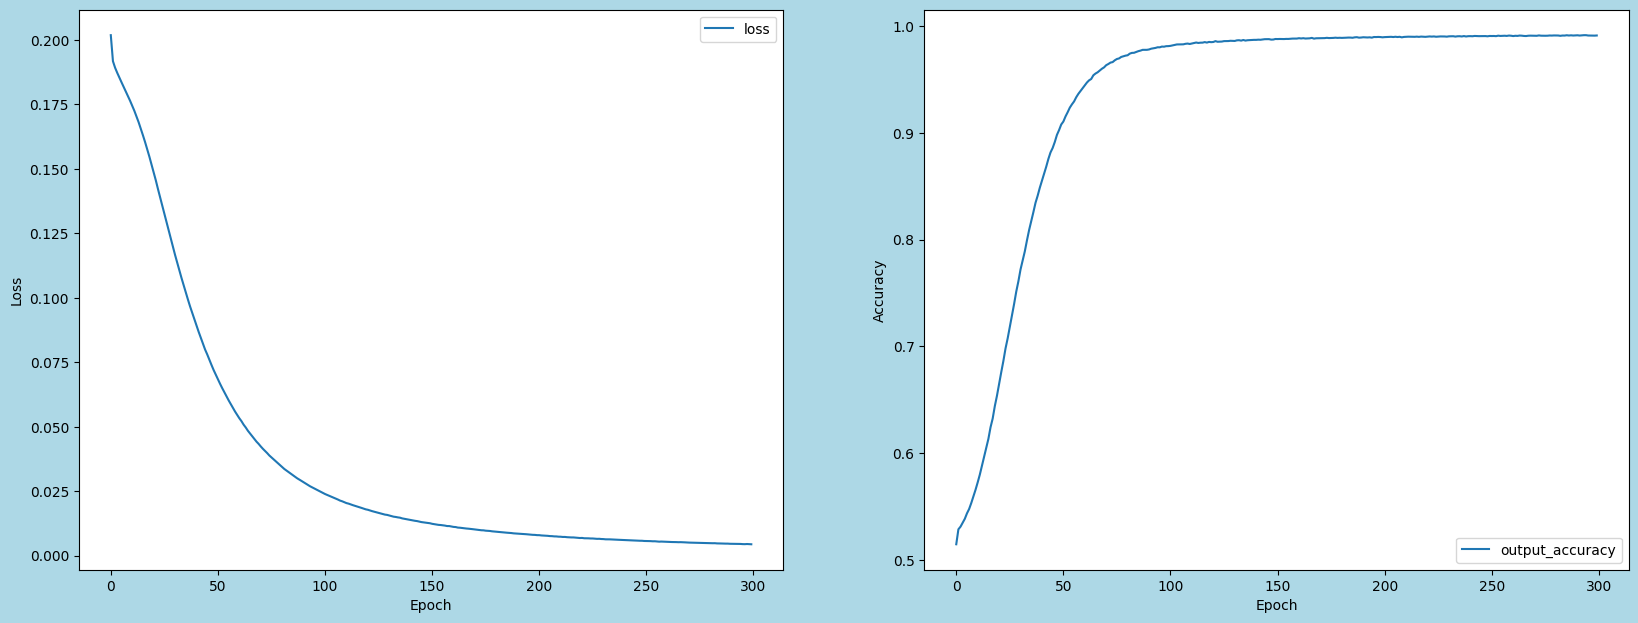

In [7]:
sl.printLearnData(history)

In [8]:
predictions = sl.predict(model, input_board, input_move)

3125/3125 [==============================] - 7s 2ms/step


              draw     first    second
teach     0.000000  1.000000  0.000000
generate  0.309219  0.563959  0.127494
delta    -0.309219  0.436041 -0.127494
             draw     first    second
teach     0.00000  0.000000  1.000000
generate  0.48995  0.038201  0.472372
delta    -0.48995 -0.038201  0.527628
              draw     first    second
teach     0.333300  0.000000  0.666700
generate  0.359661  0.259027  0.381755
delta    -0.026361 -0.259027  0.284945
             draw     first    second
teach     0.50000  0.500000  0.000000
generate  0.24981  0.277141  0.473458
delta     0.25019  0.222859 -0.473458
              draw     first    second
teach     0.500000  0.166700  0.333300
generate  0.470758  0.124719  0.404643
delta     0.029242  0.041981 -0.071343
              draw     first    second
teach     0.500000  0.500000  0.000000
generate  0.250344  0.457911  0.292749
delta     0.249656  0.042089 -0.292749
              draw     first    second
teach     0.666700  0.111100  0.2

C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_1008\737604176.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (13, 5), facecolor= 'lightblue')


              draw     first    second
teach     0.500000  0.500000  0.000000
generate  0.348457  0.346761  0.305208
delta     0.151543  0.153239 -0.305208
              draw    first    second
teach     0.000000  1.00000  0.000000
generate  0.212392  0.38526  0.402813
delta    -0.212392  0.61474 -0.402813
              draw     first    second
teach     0.500000  0.000000  0.500000
generate  0.467049  0.189527  0.343793
delta     0.032951 -0.189527  0.156207
              draw    first    second
teach     0.333300  0.66670  0.000000
generate  0.219576  0.67729  0.103443
delta     0.113724 -0.01059 -0.103443
              draw     first    second
teach     0.750000  0.250000  0.000000
generate  0.421901  0.234057  0.344296
delta     0.328099  0.015943 -0.344296
              draw     first    second
teach     0.500000  0.000000  0.500000
generate  0.615987  0.207051  0.177085
delta    -0.115987 -0.207051  0.322915
              draw     first    second
teach     0.000000  0.500000  0.5

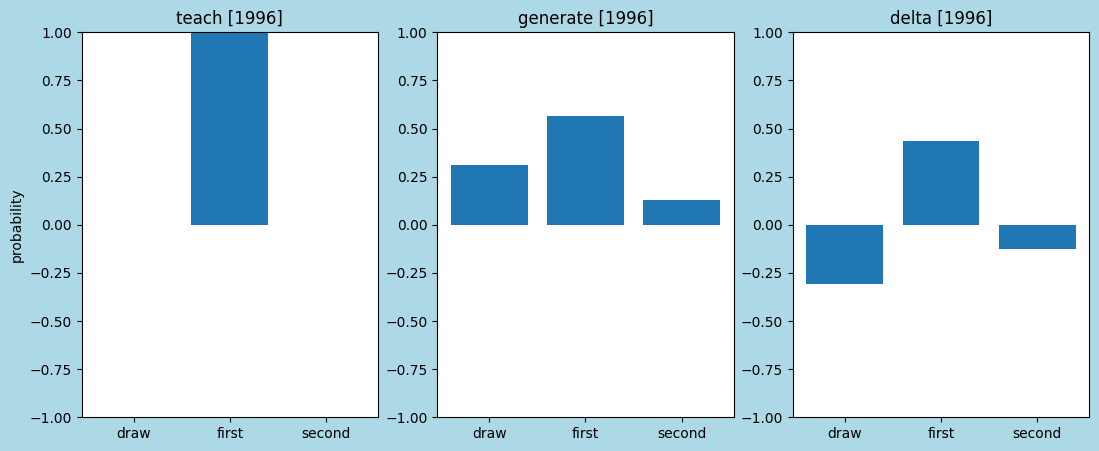

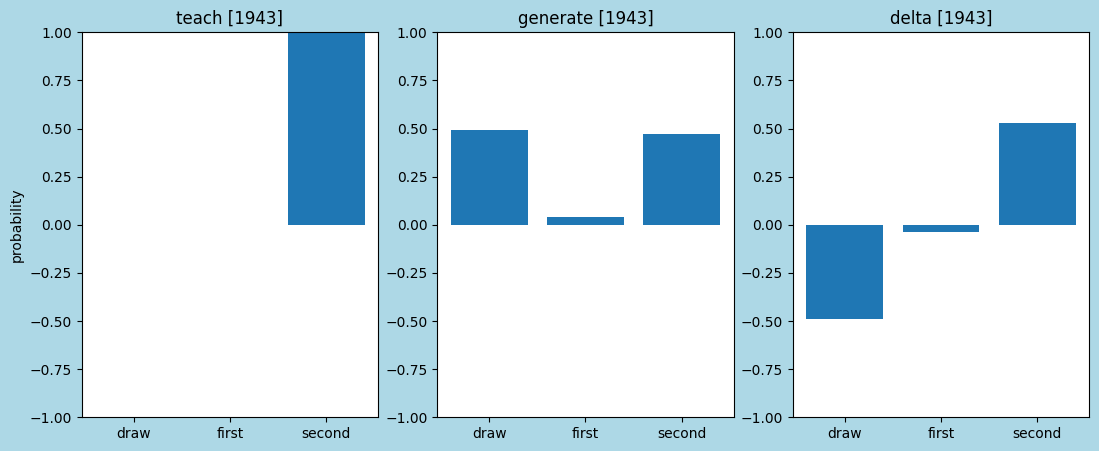

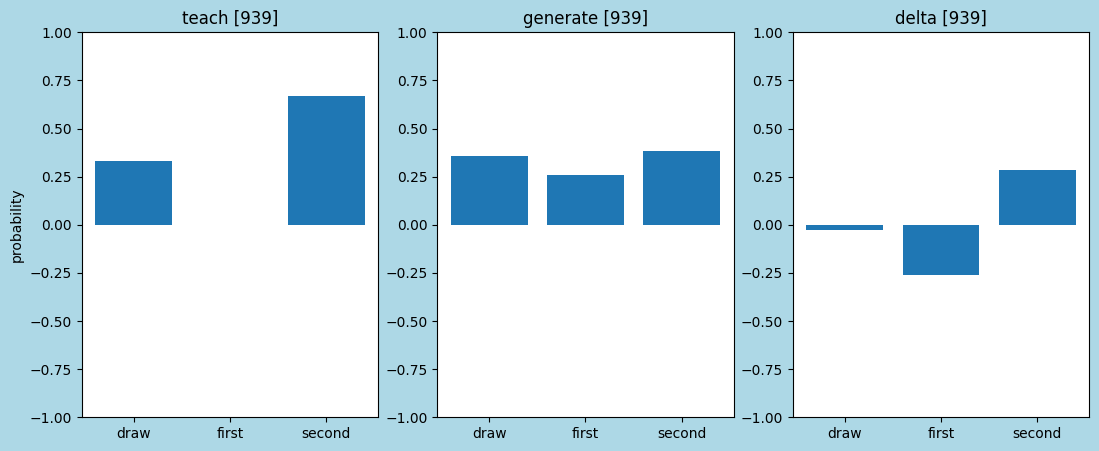

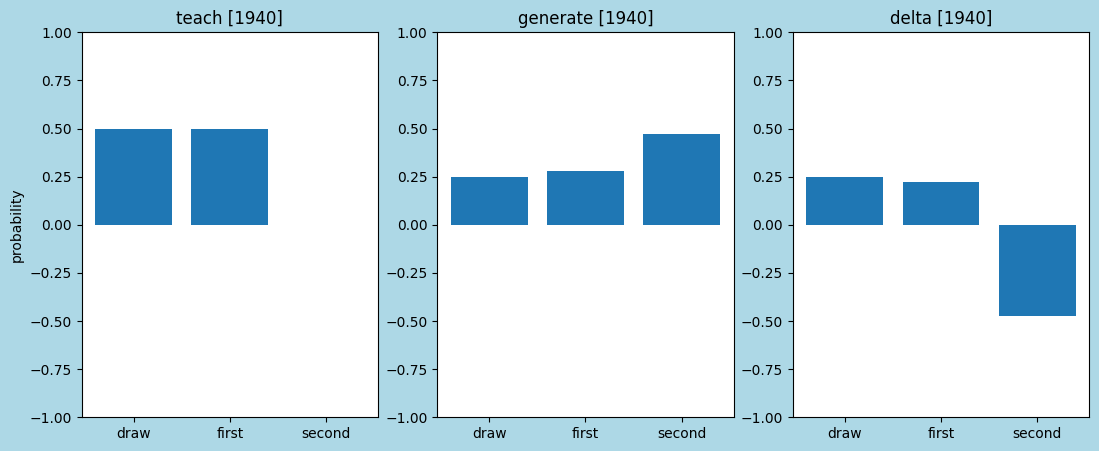

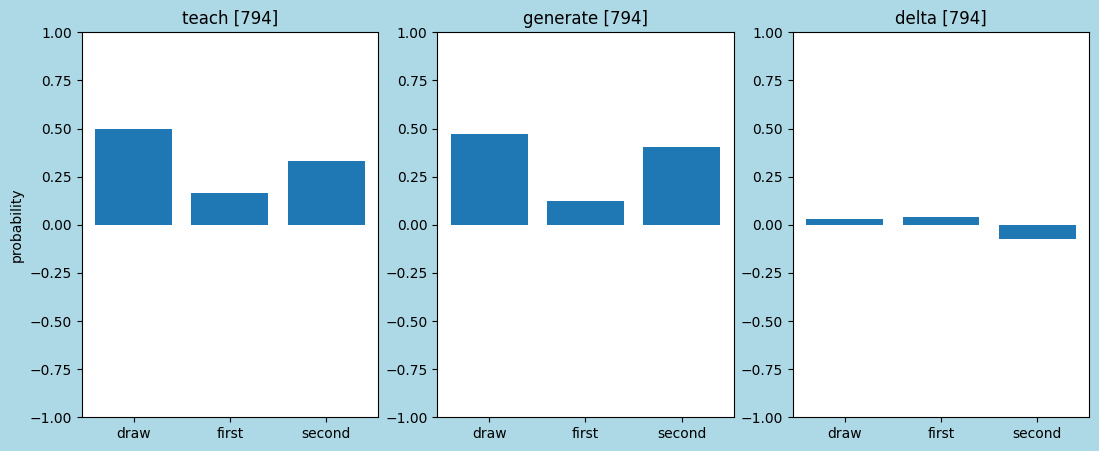

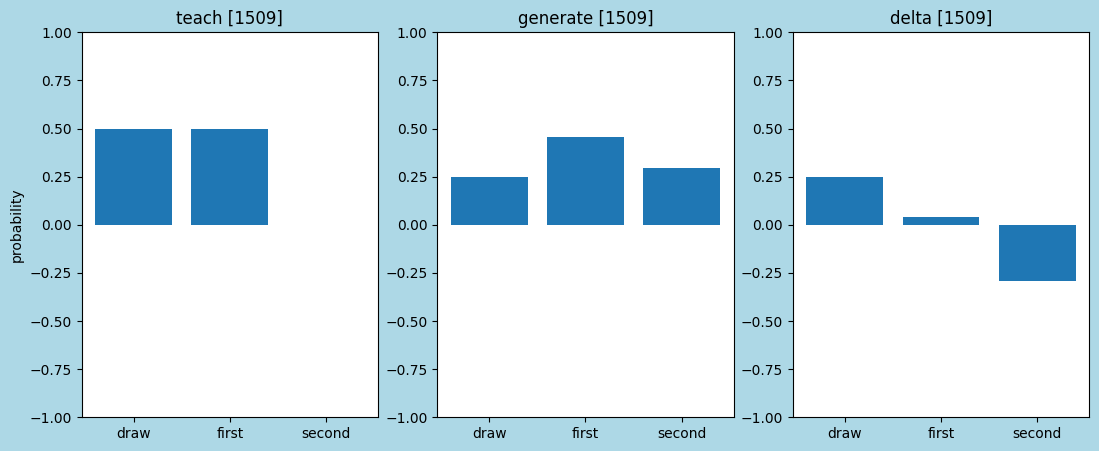

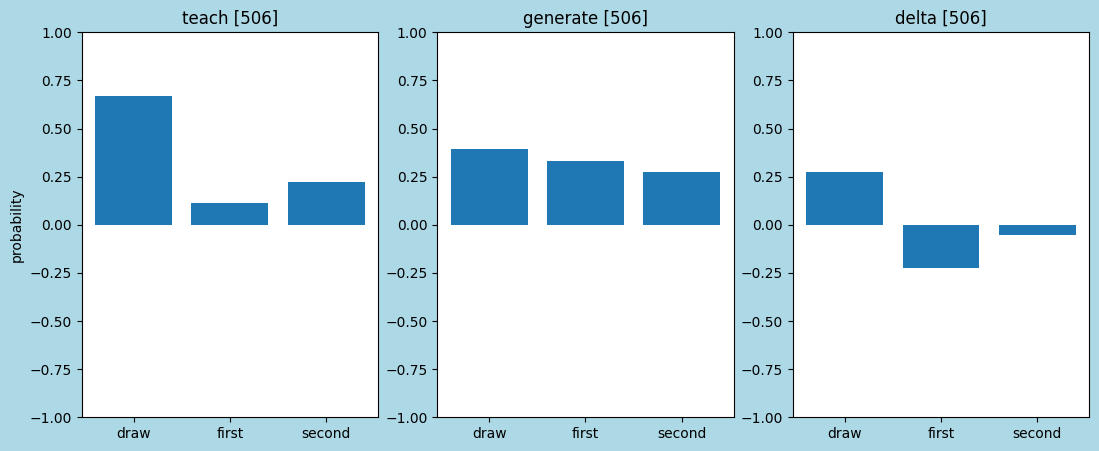

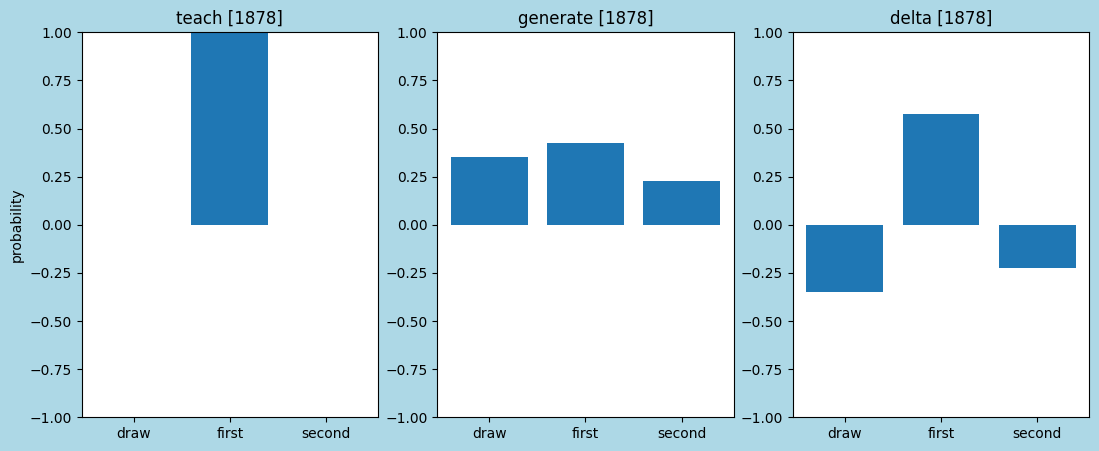

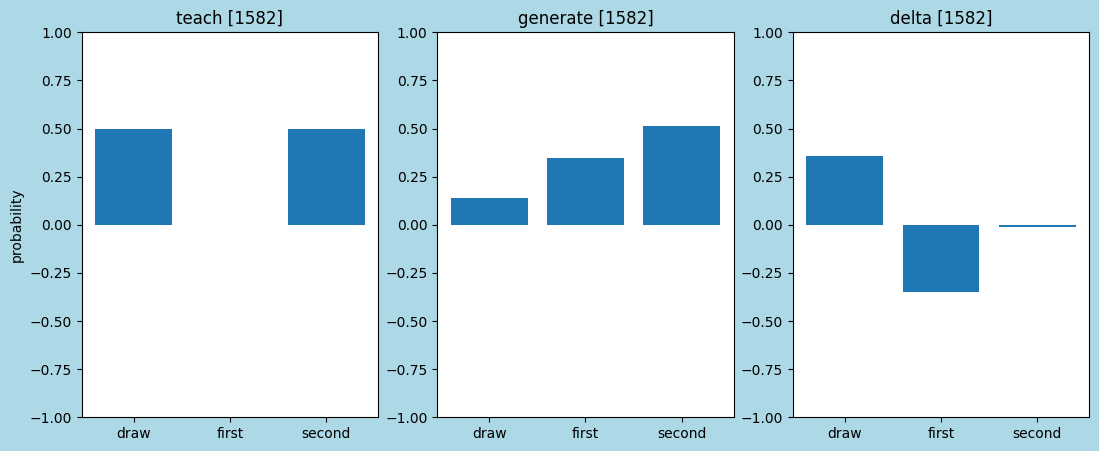

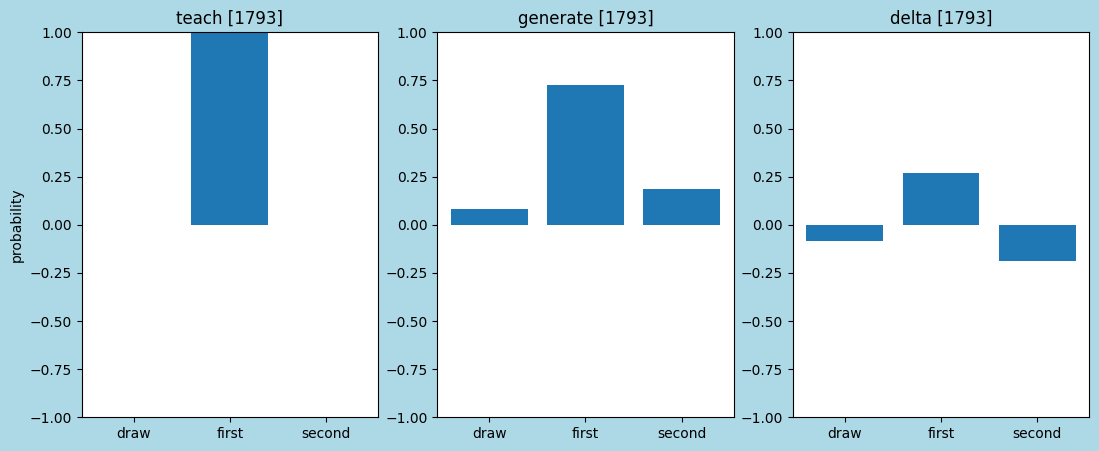

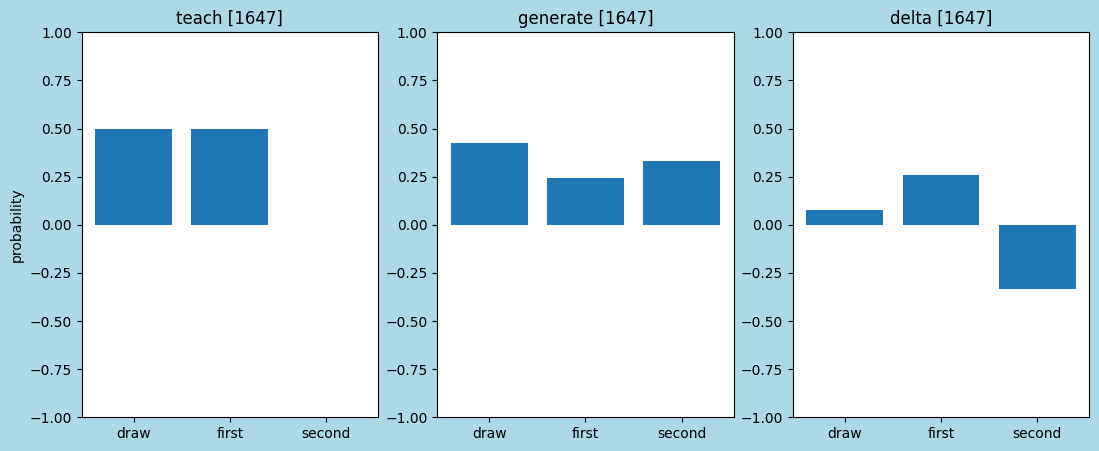

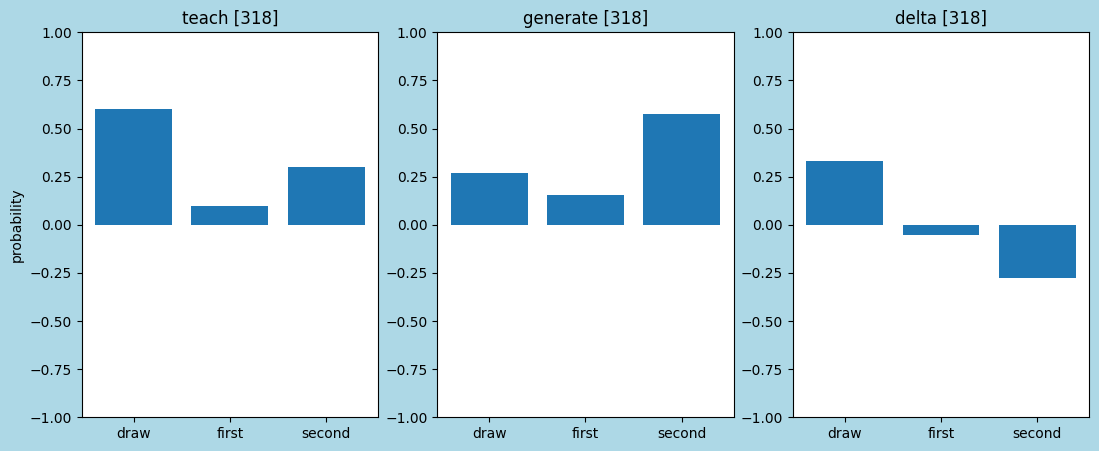

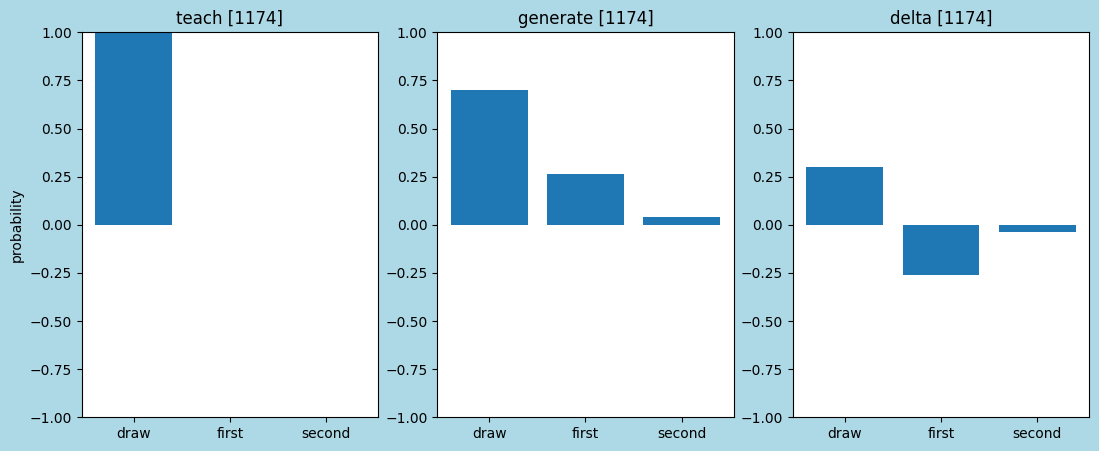

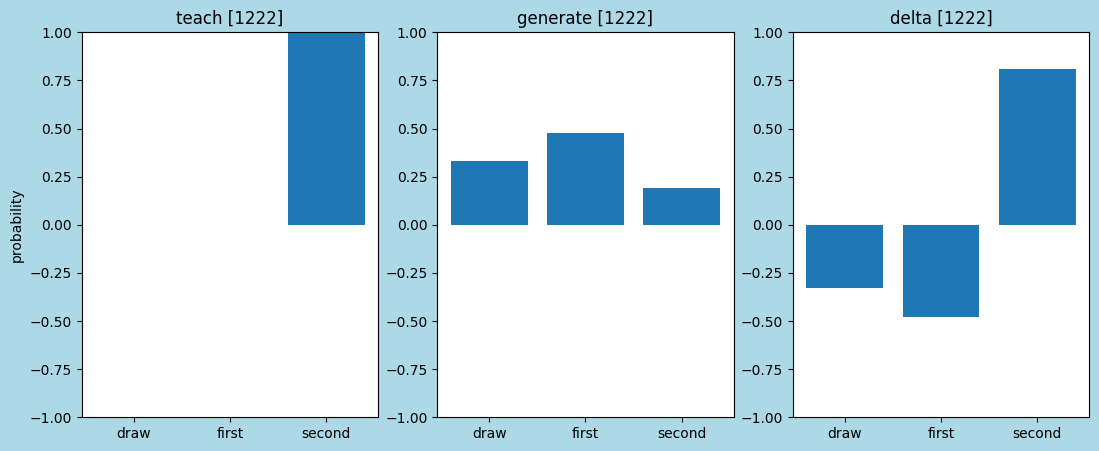

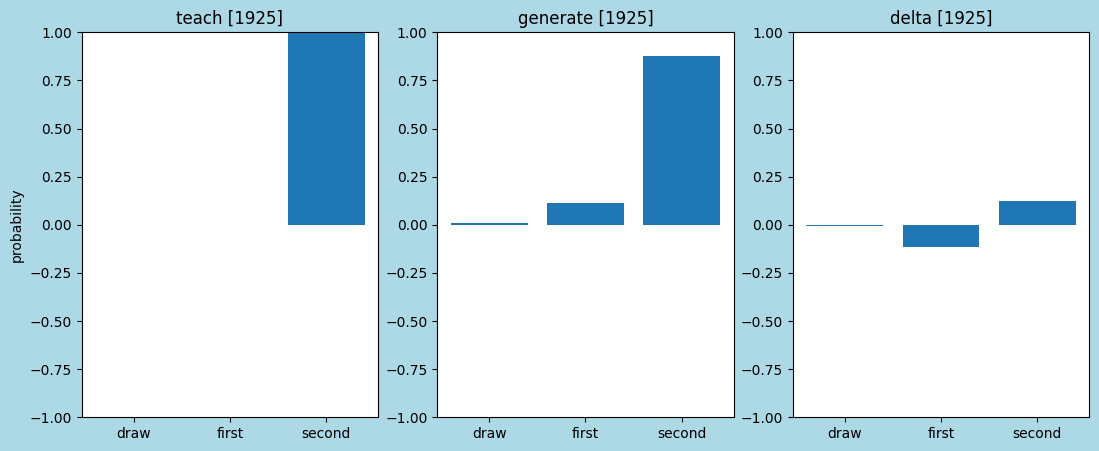

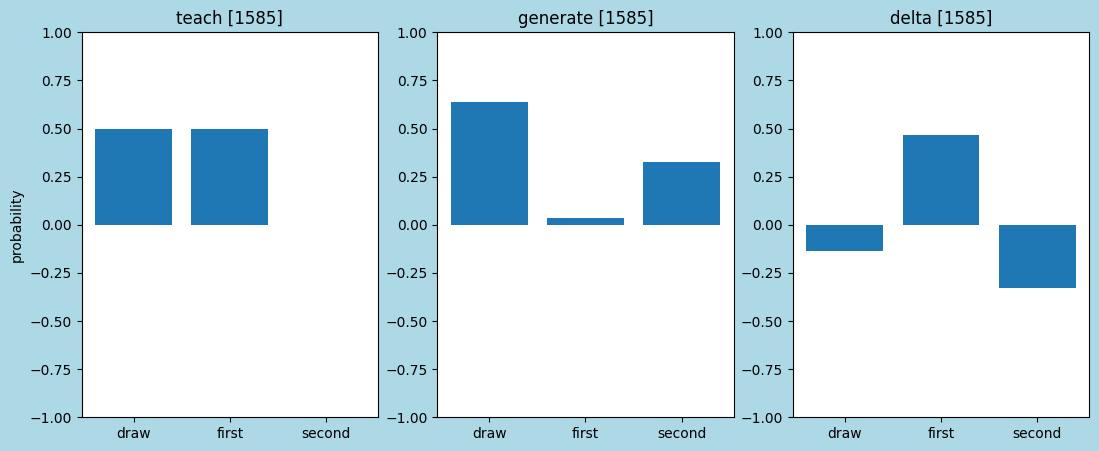

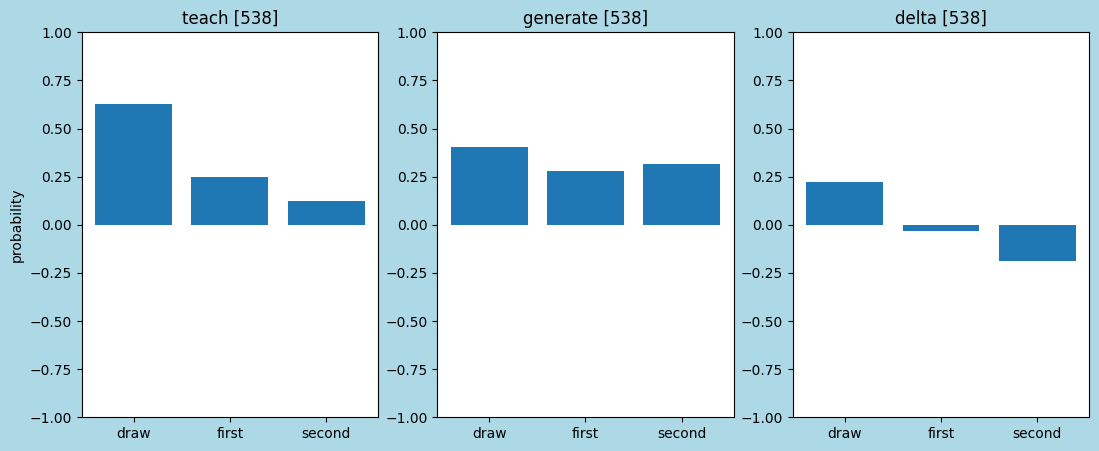

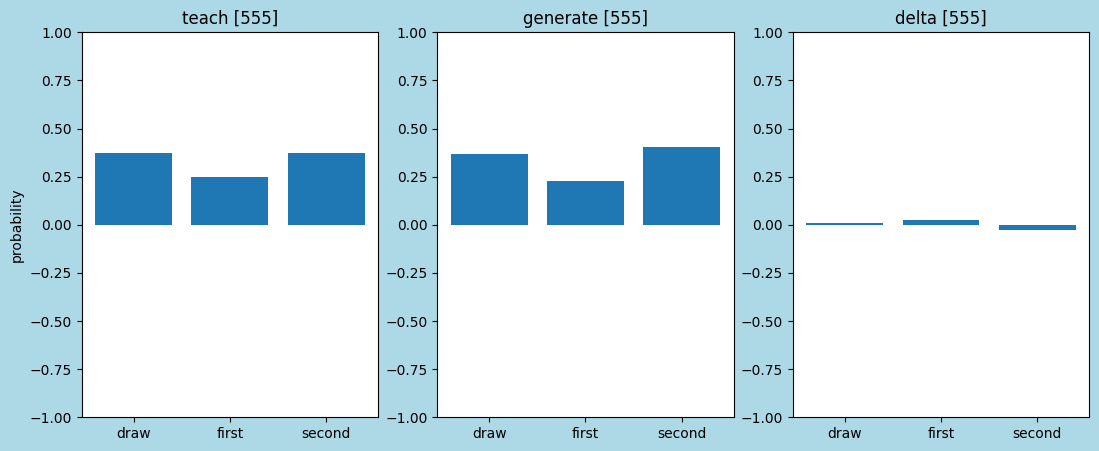

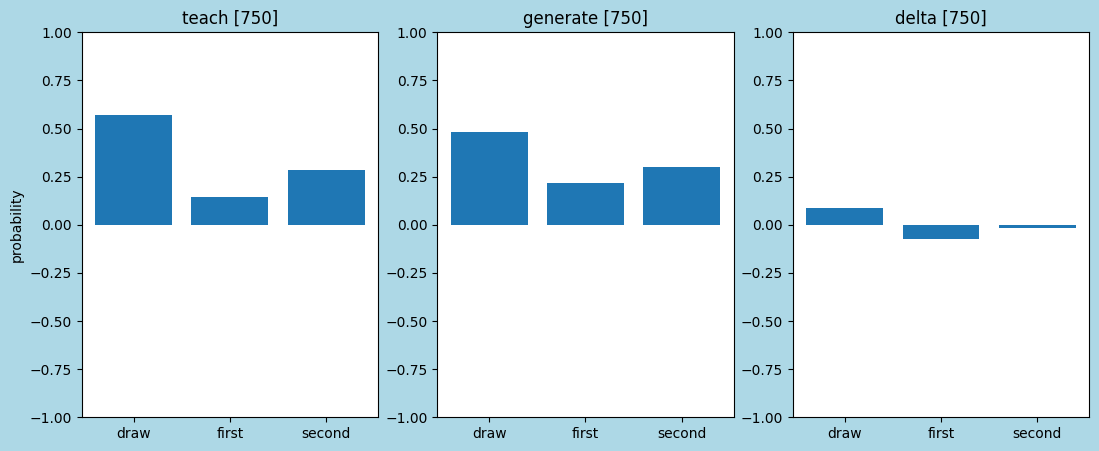

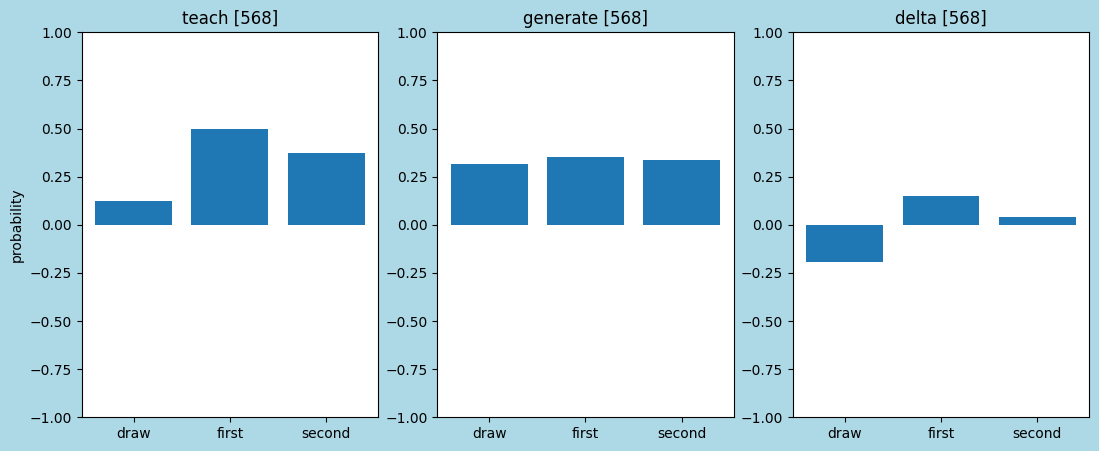

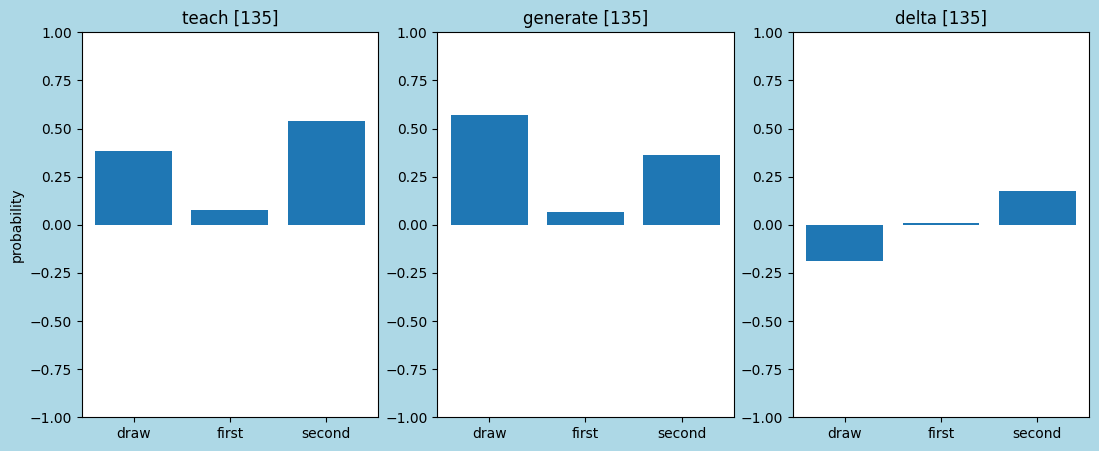

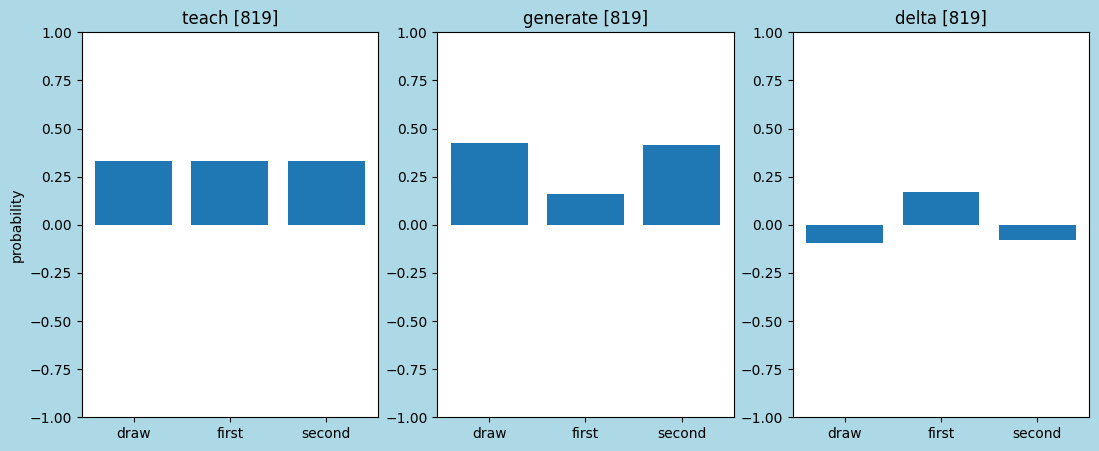

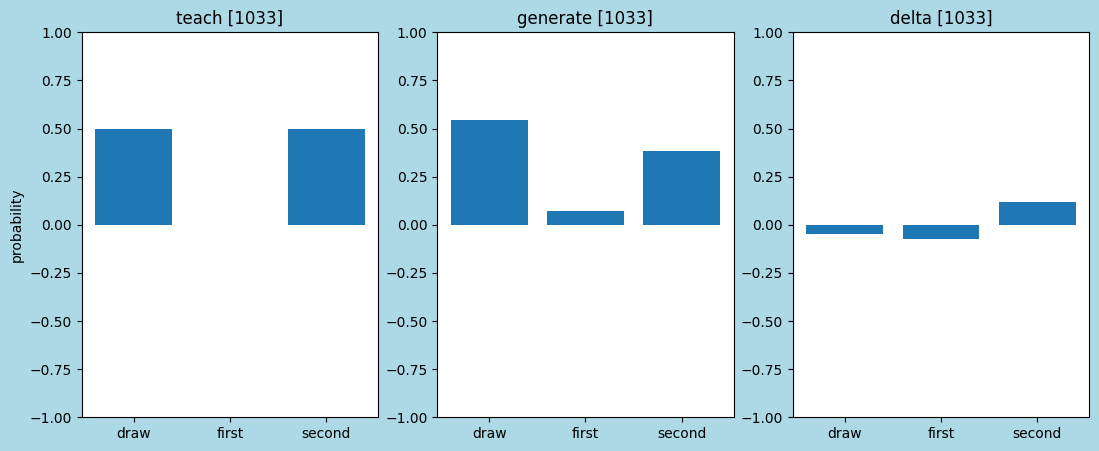

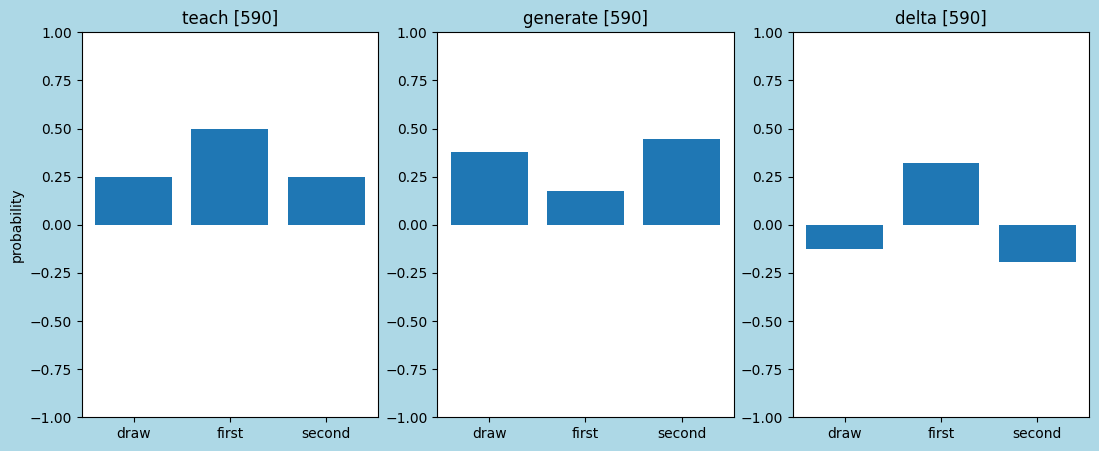

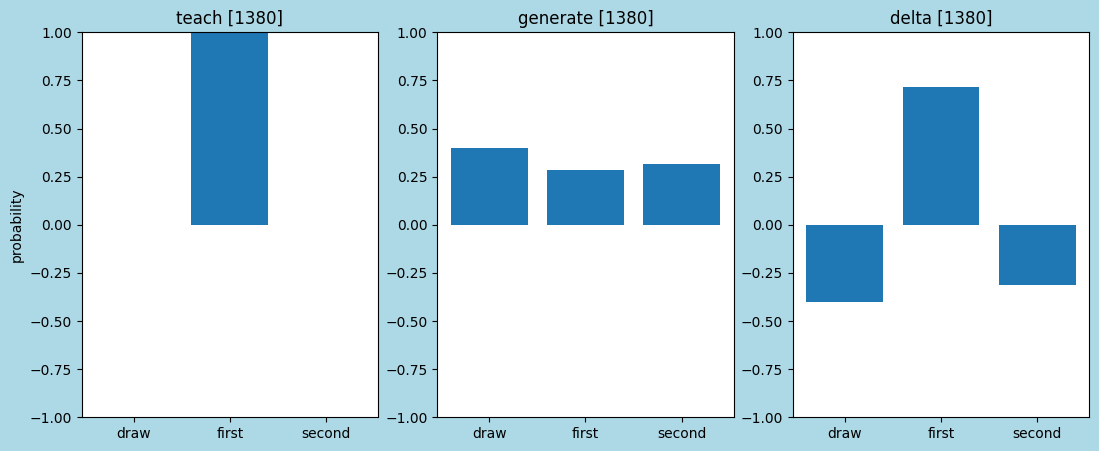

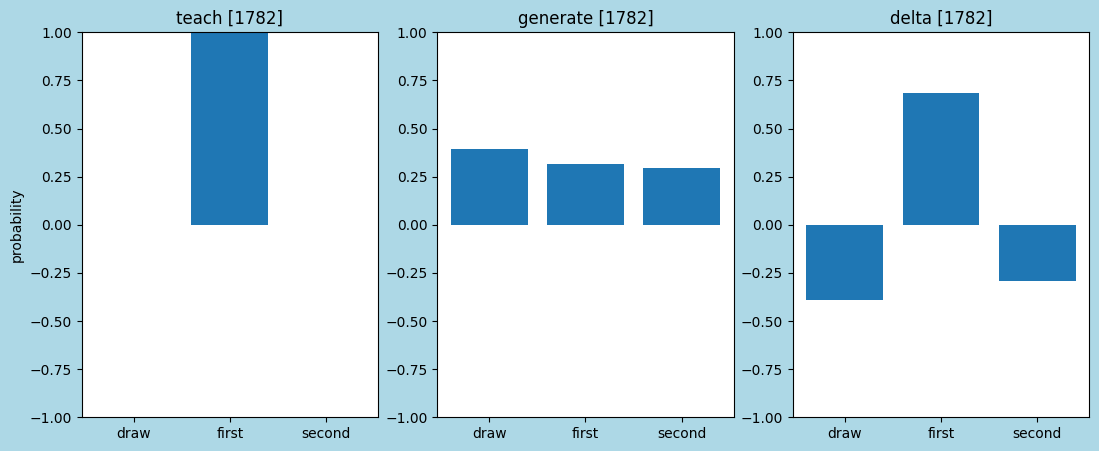

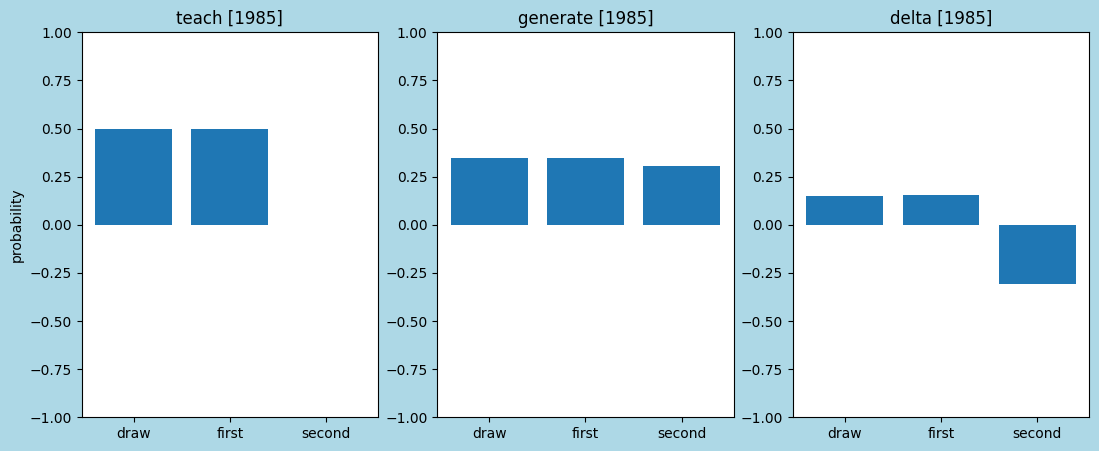

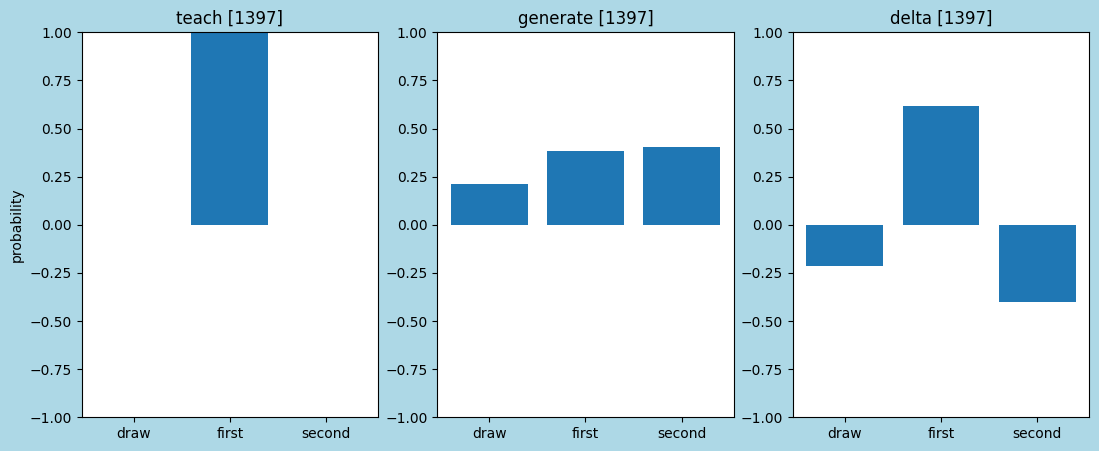

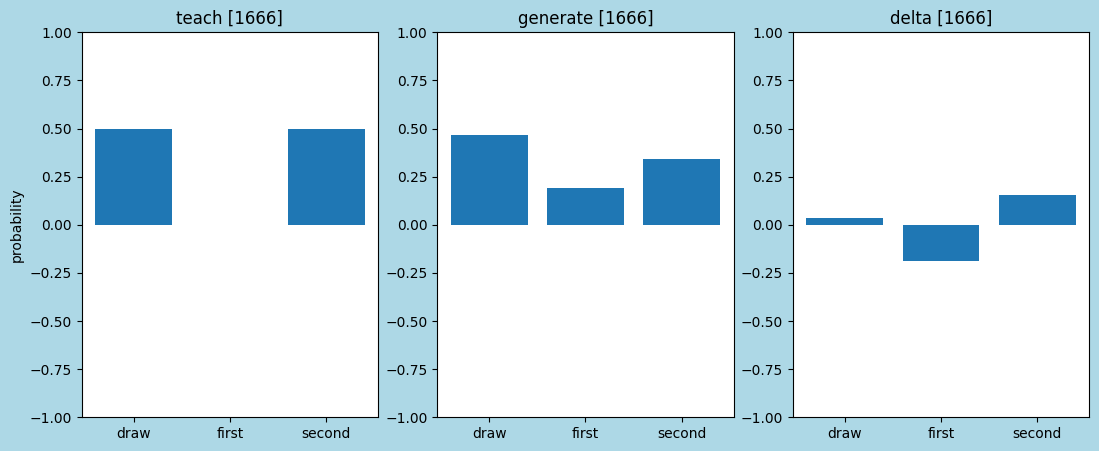

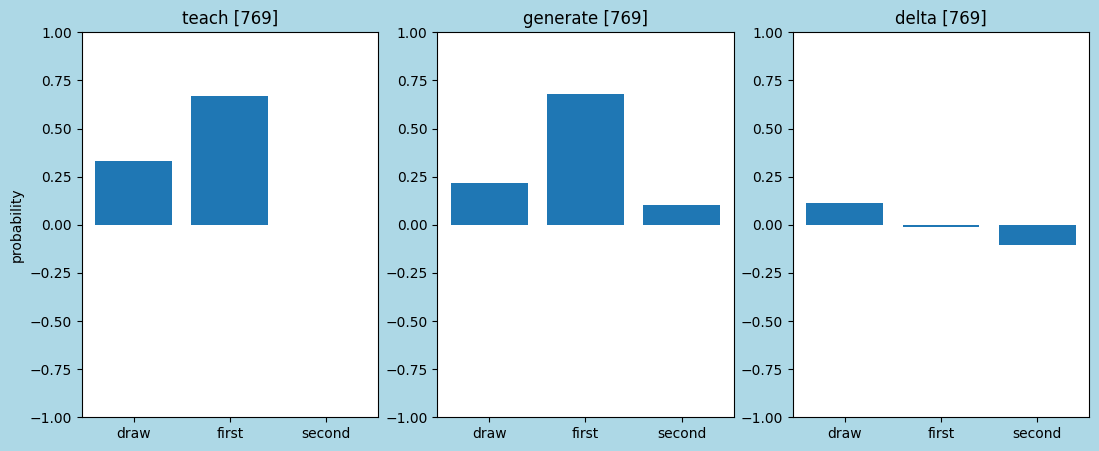

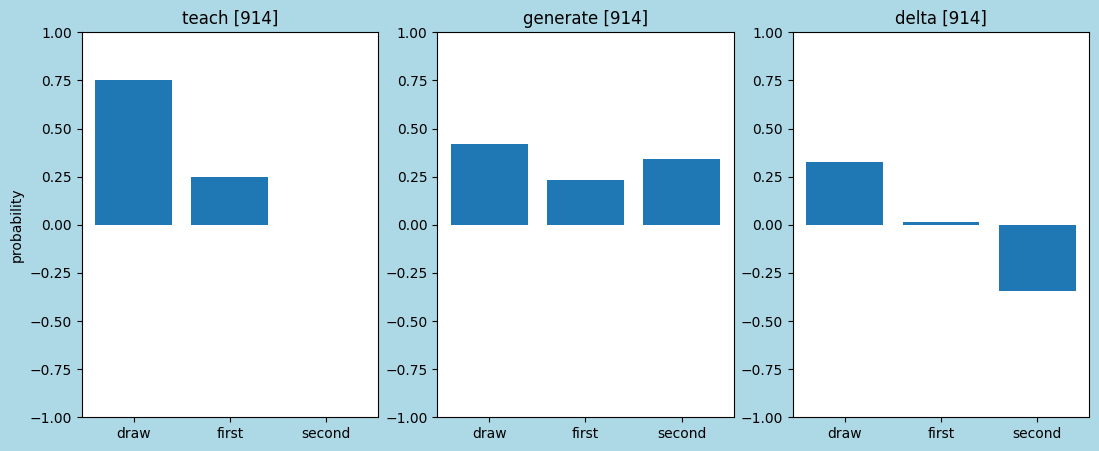

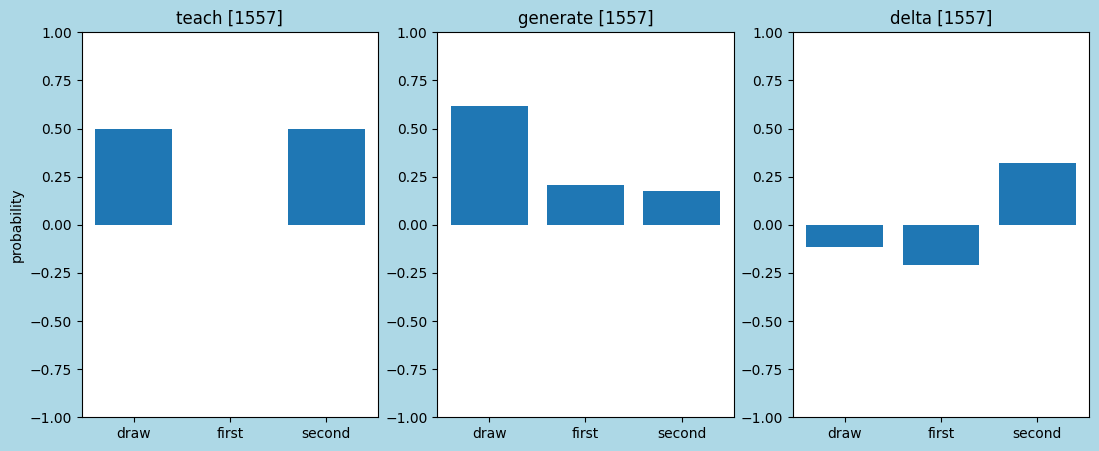

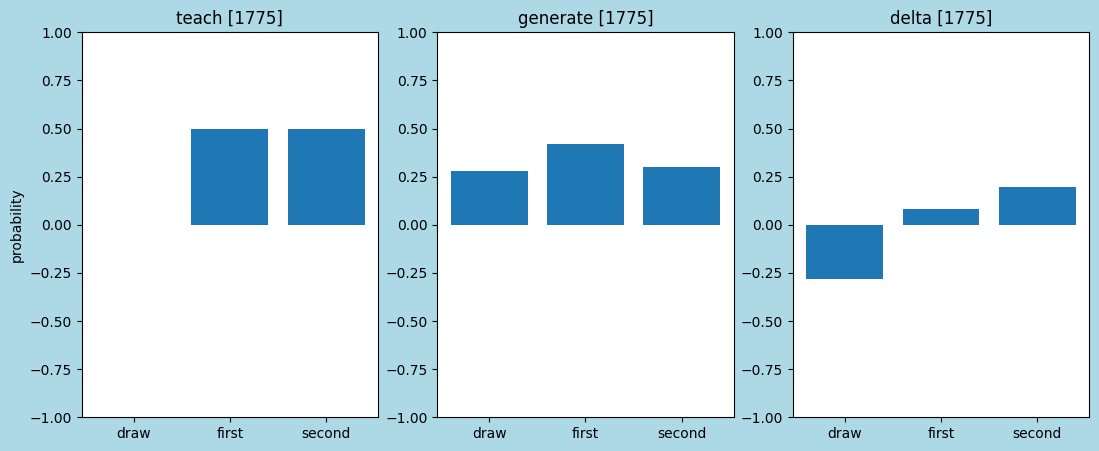

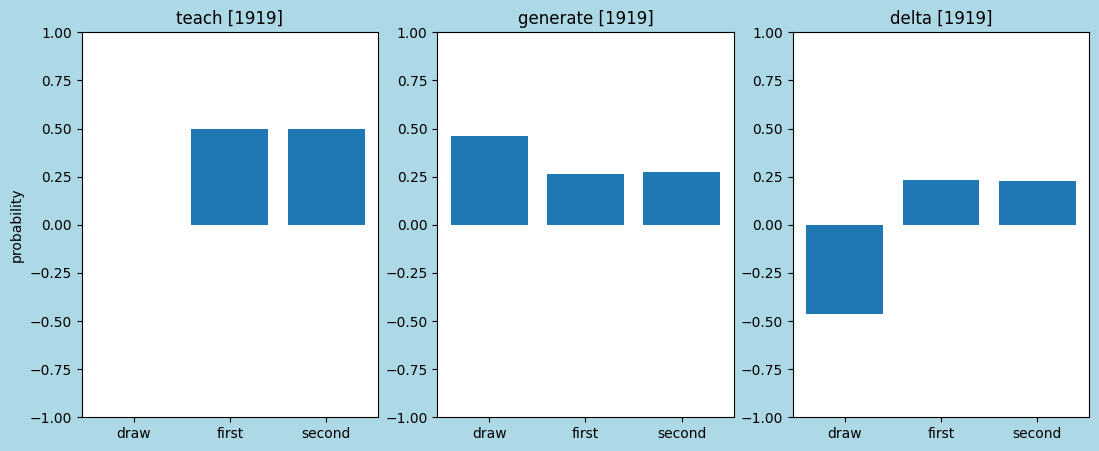

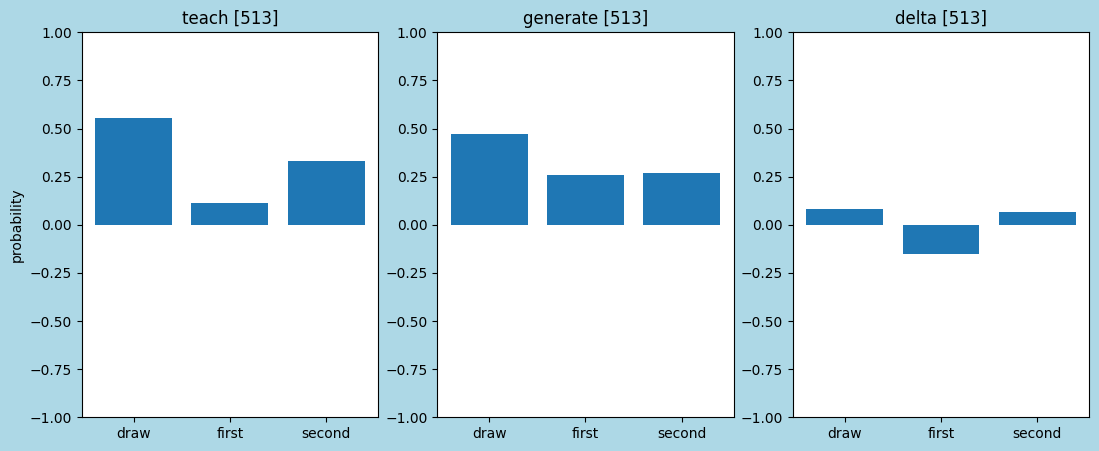

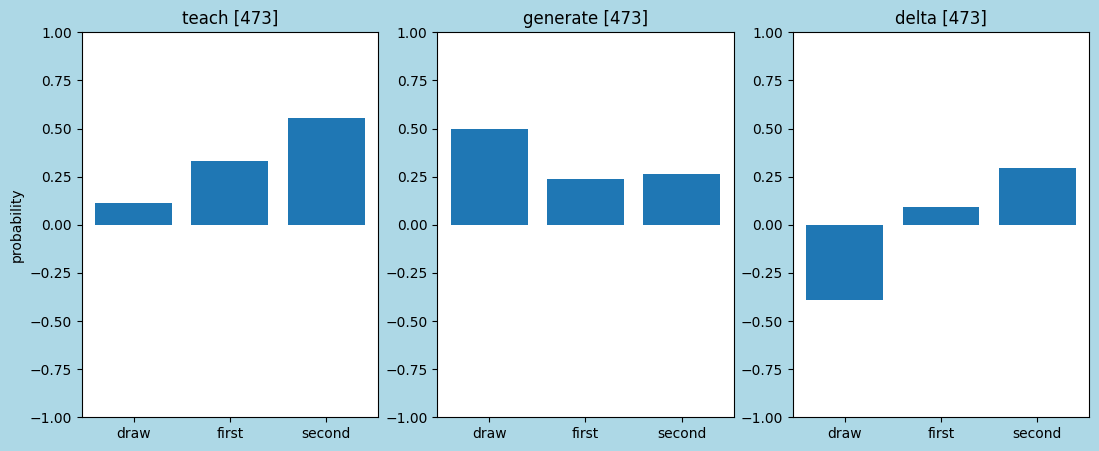

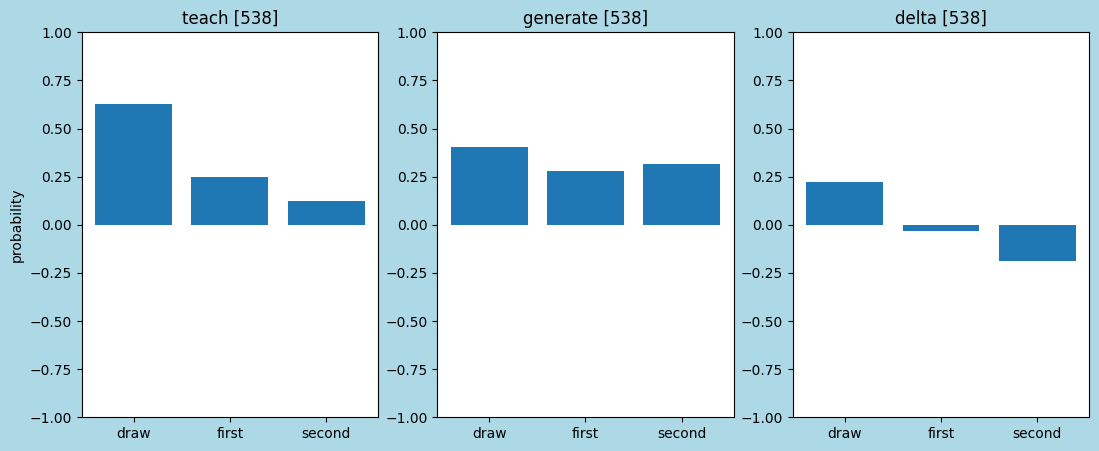

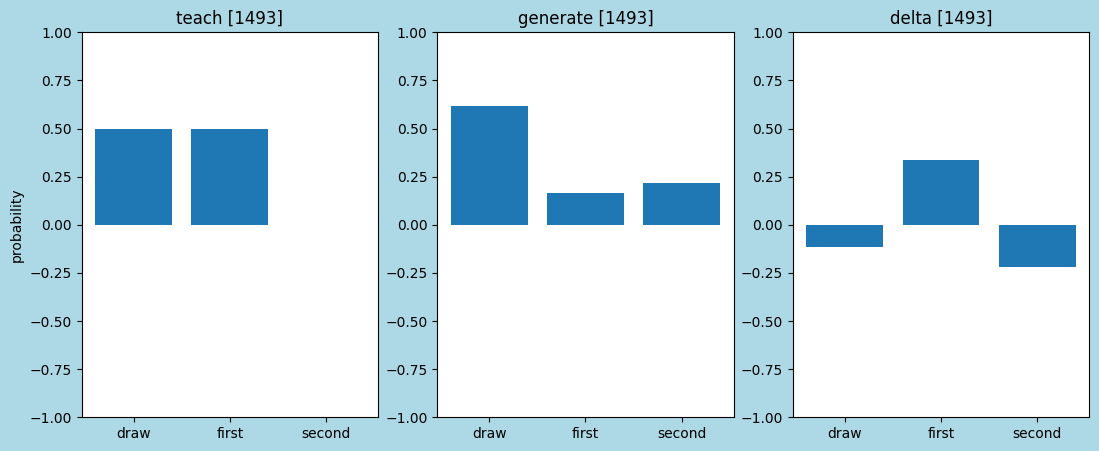

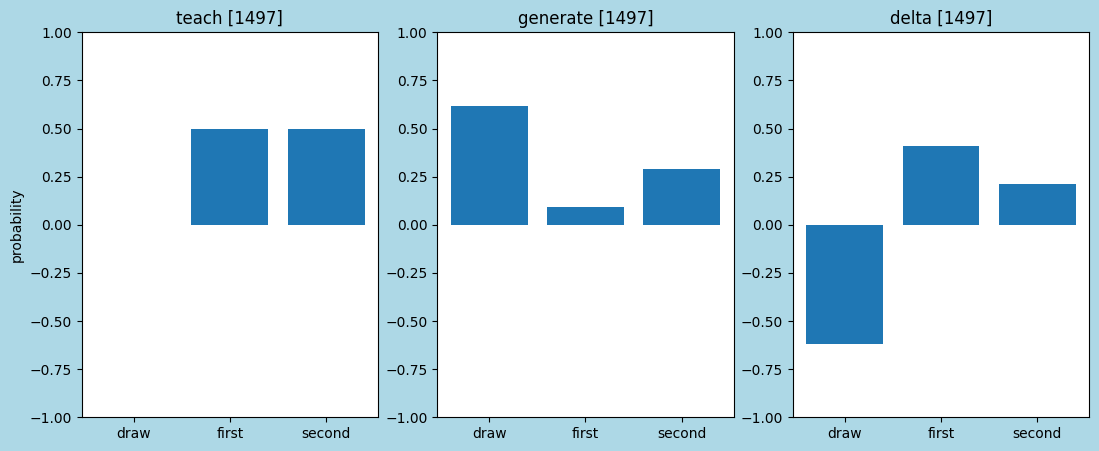

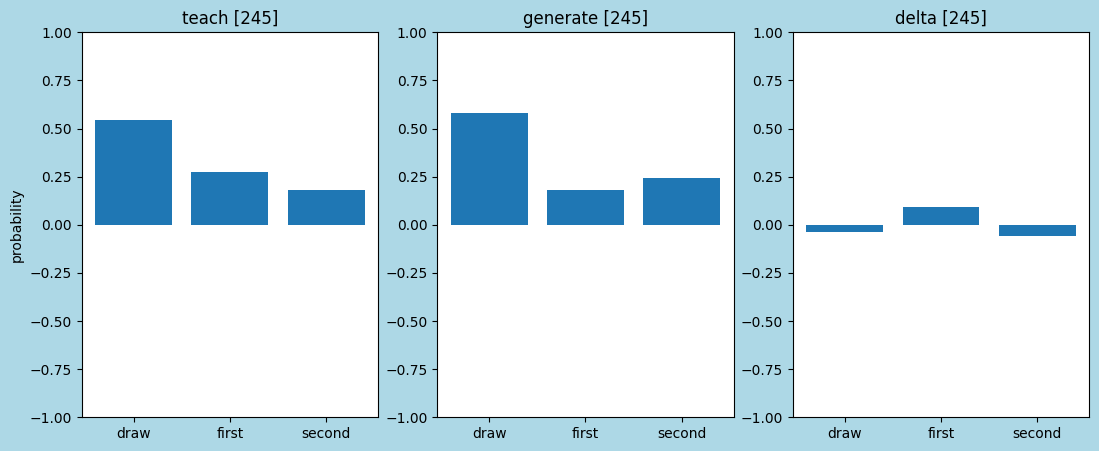

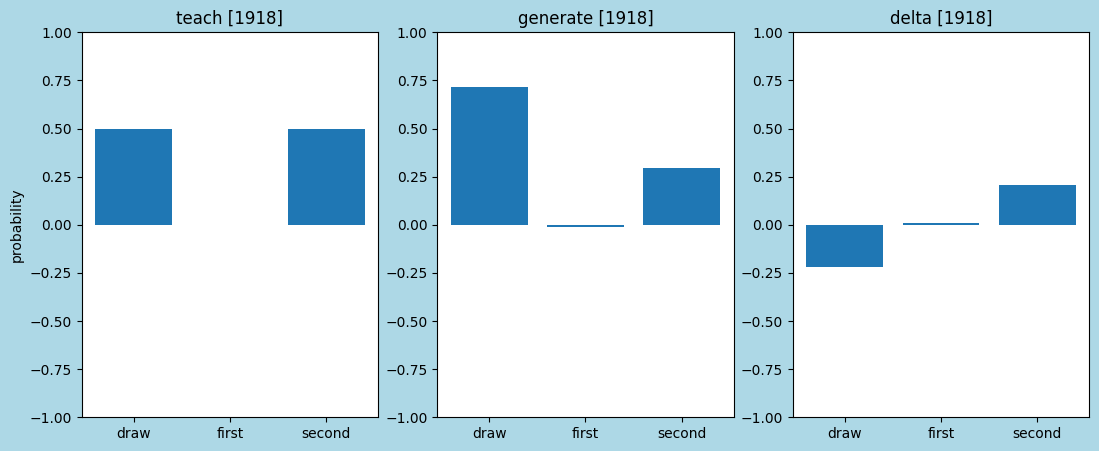

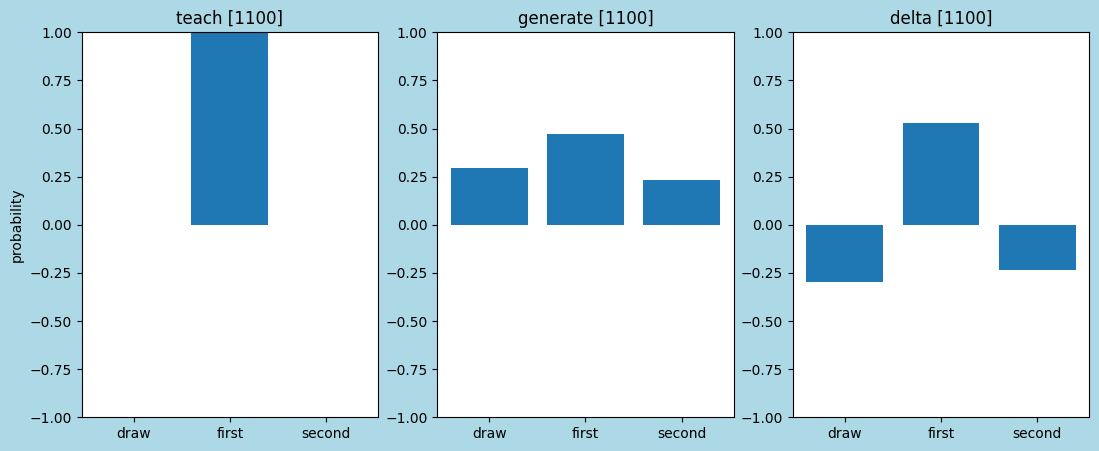

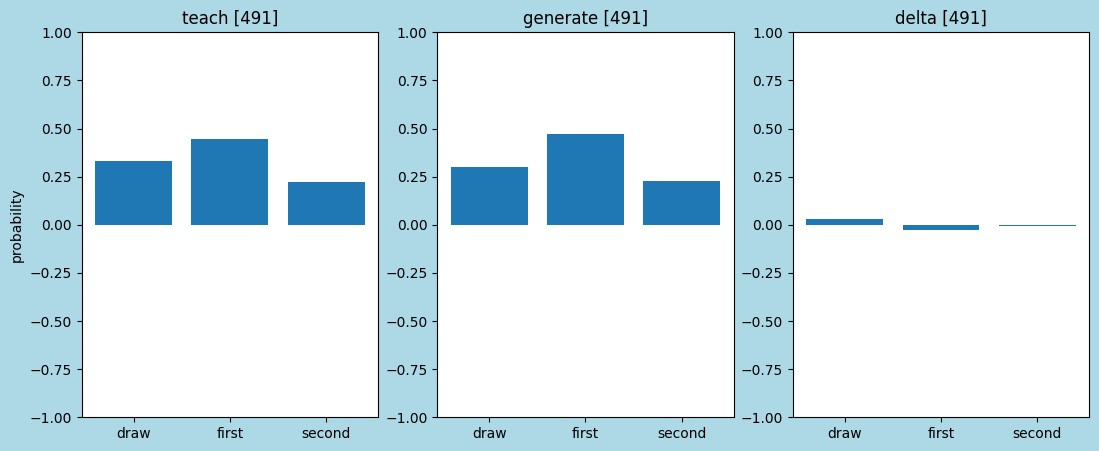

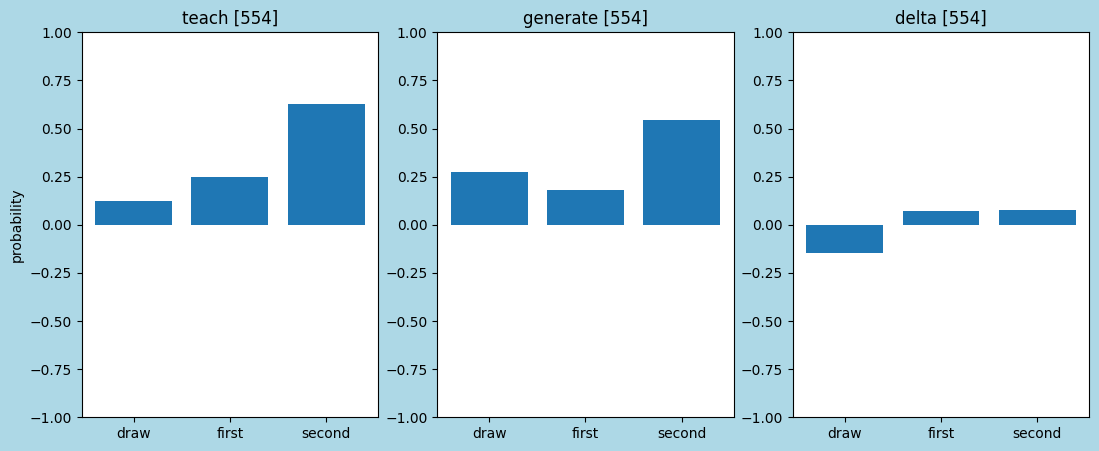

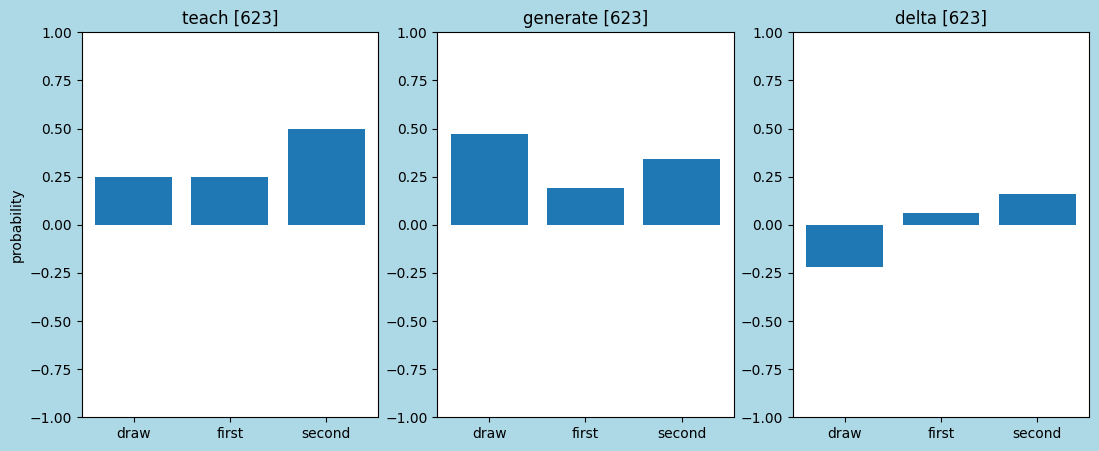

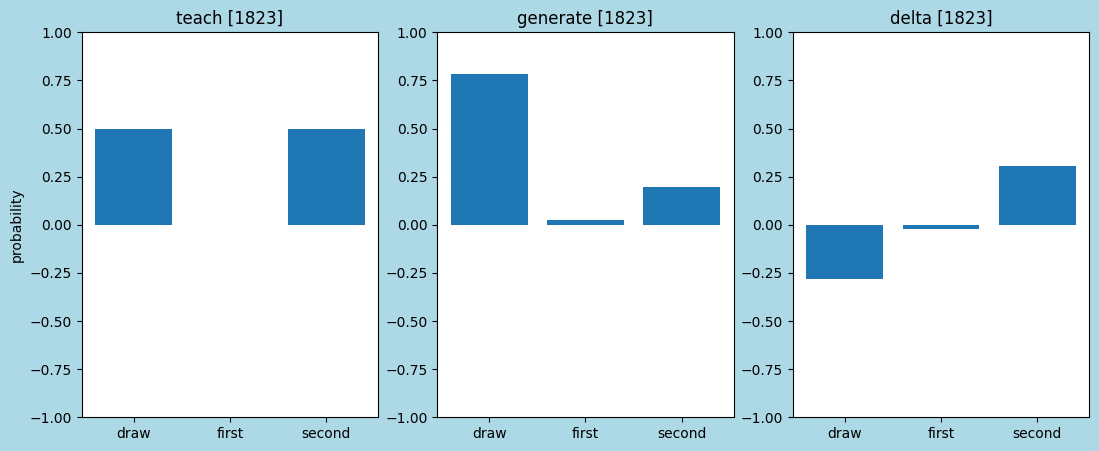

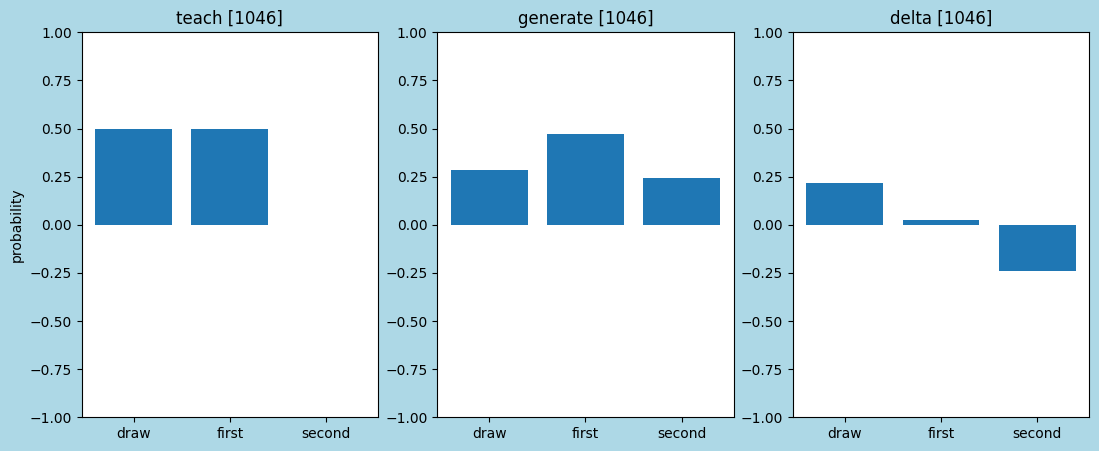

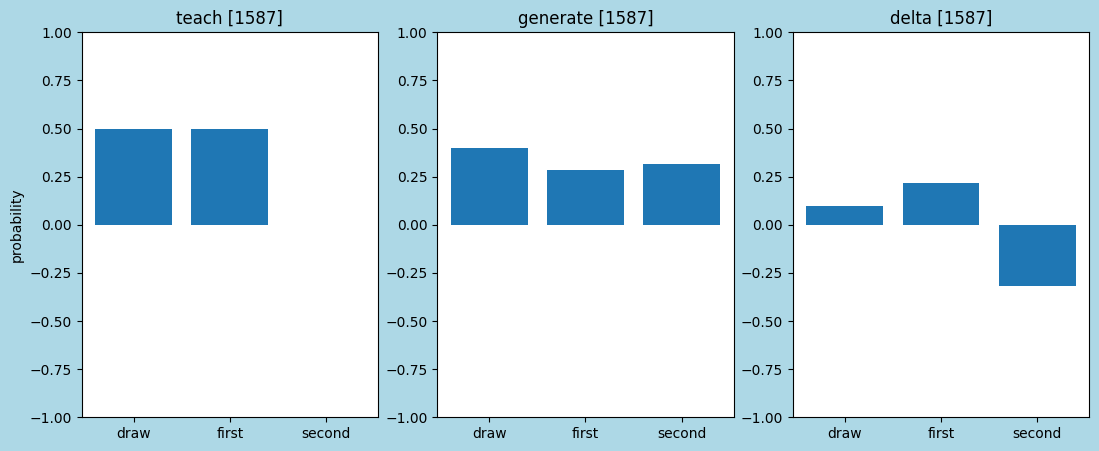

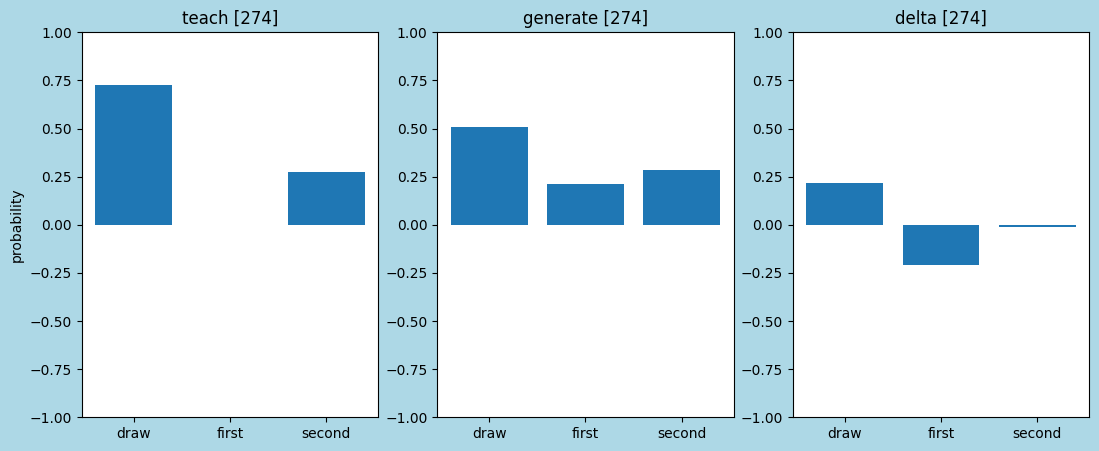

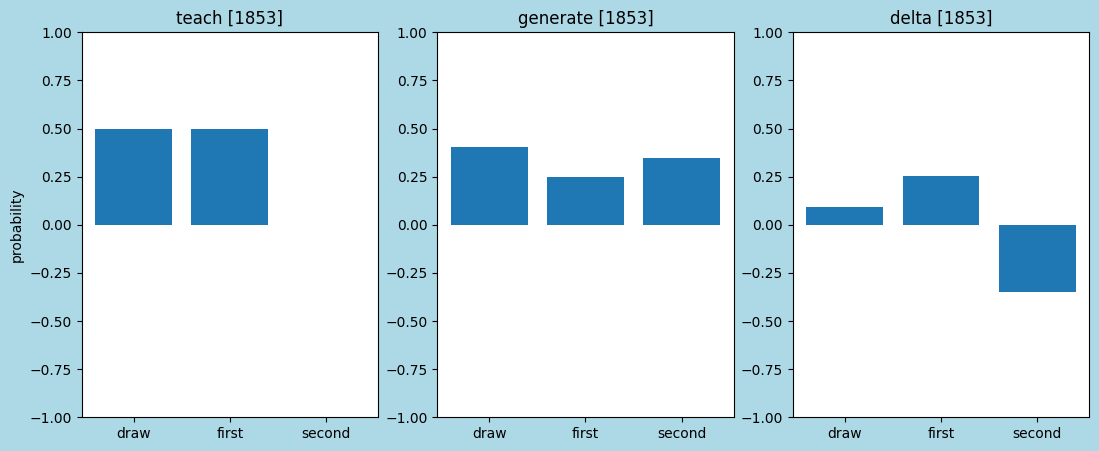

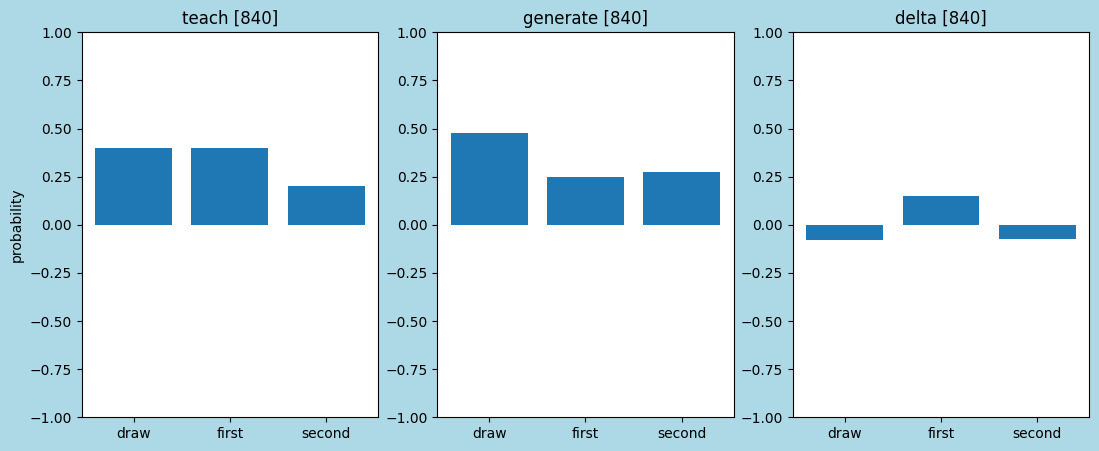

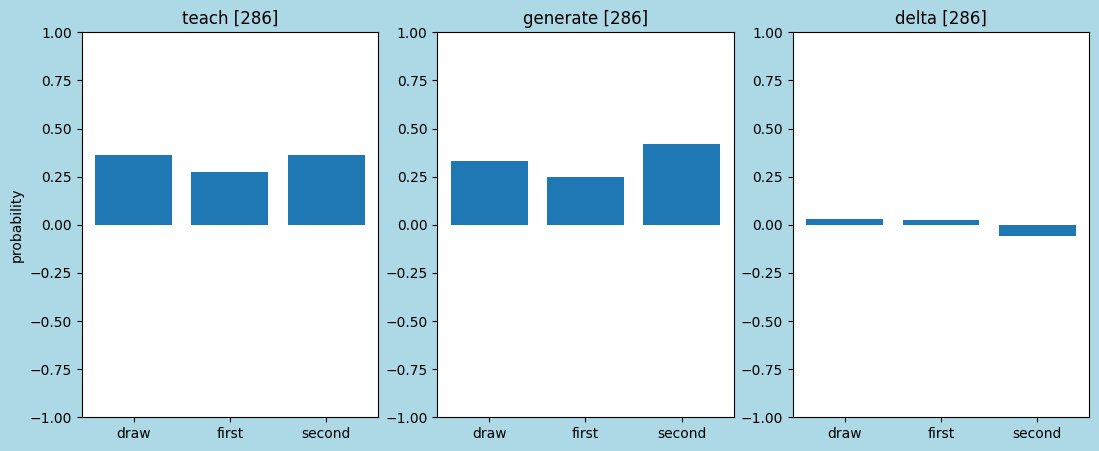

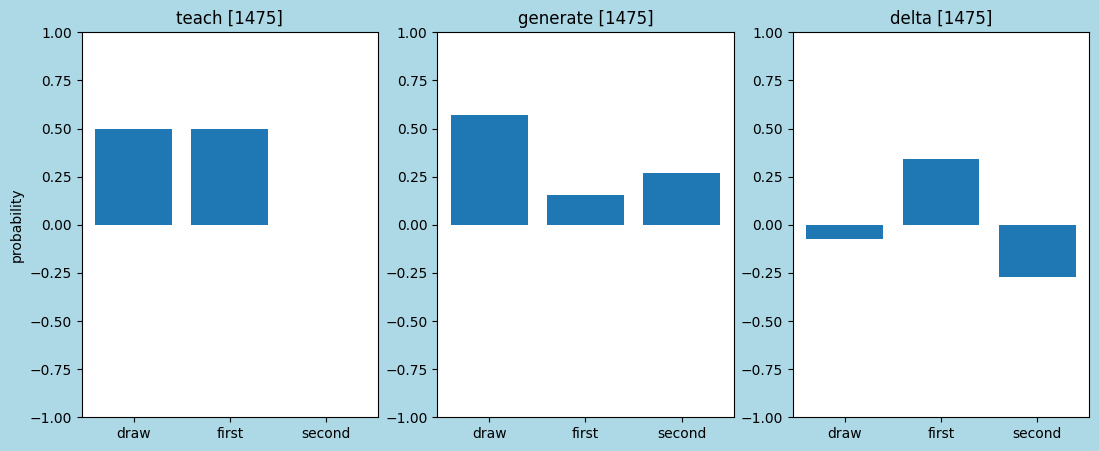

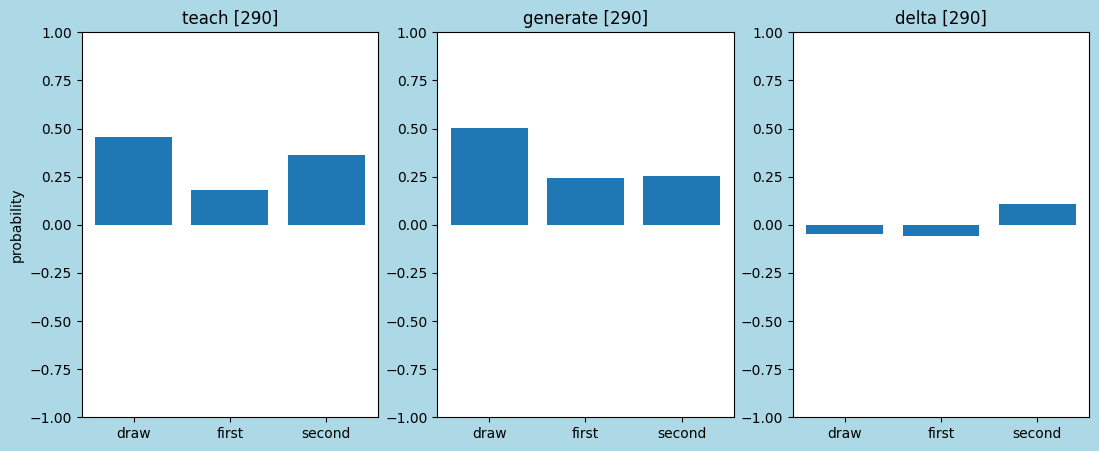

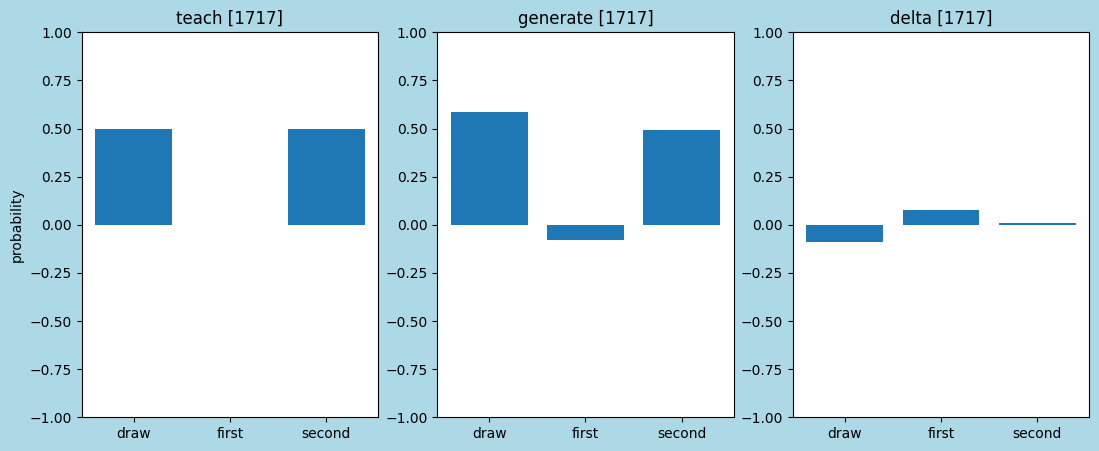

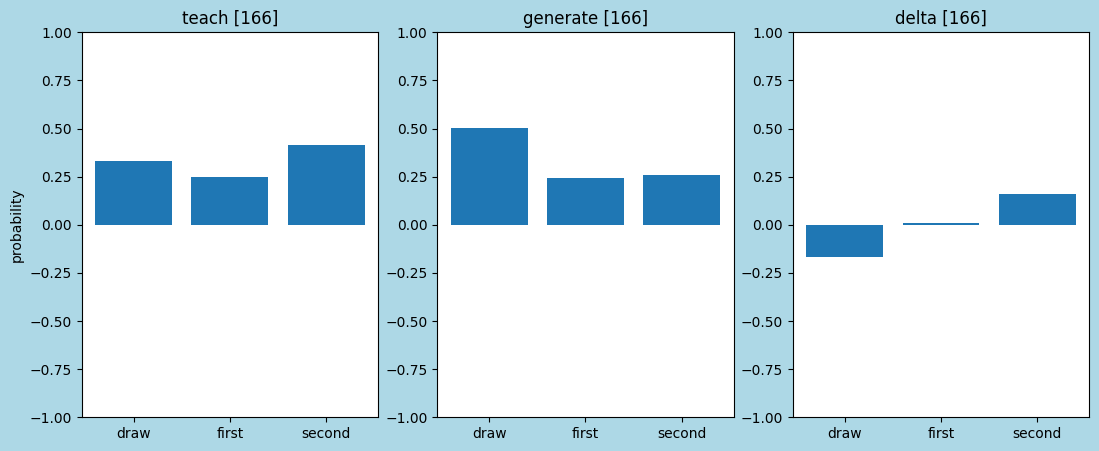

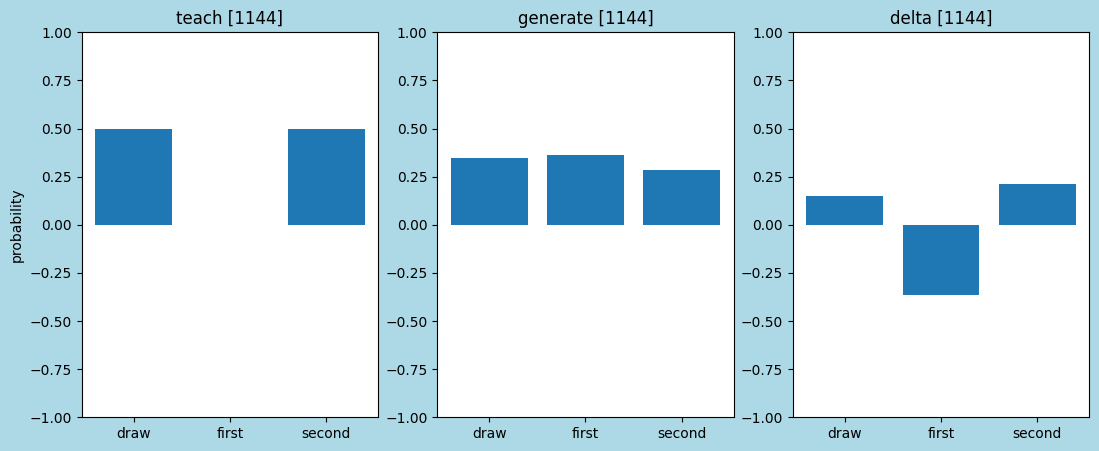

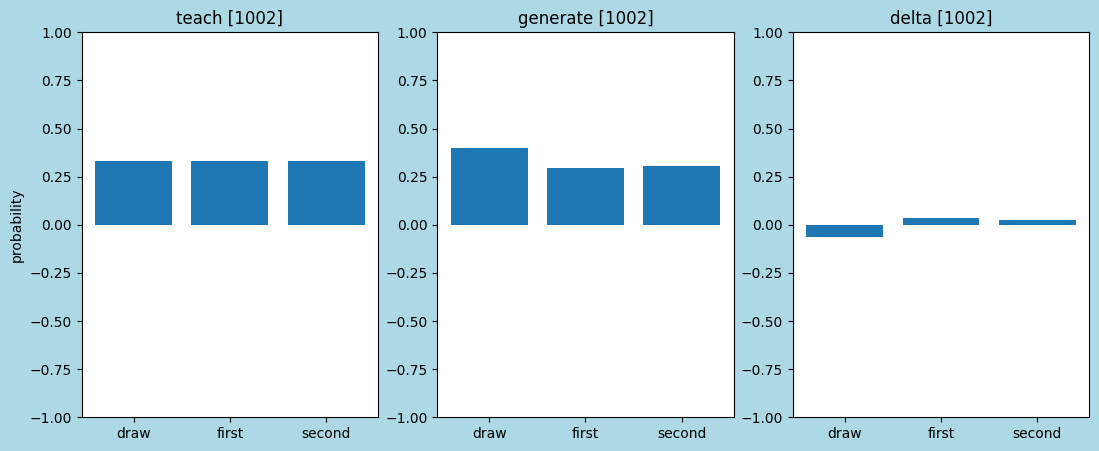

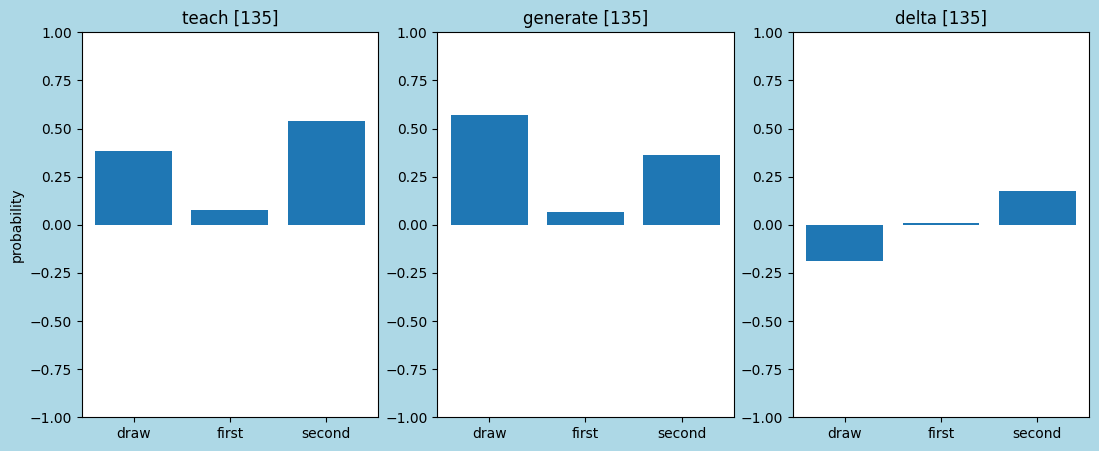

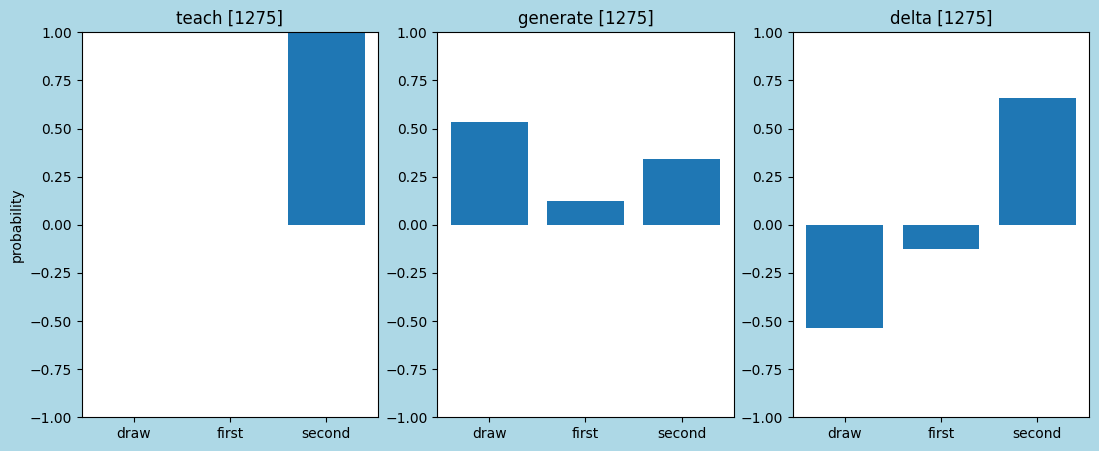

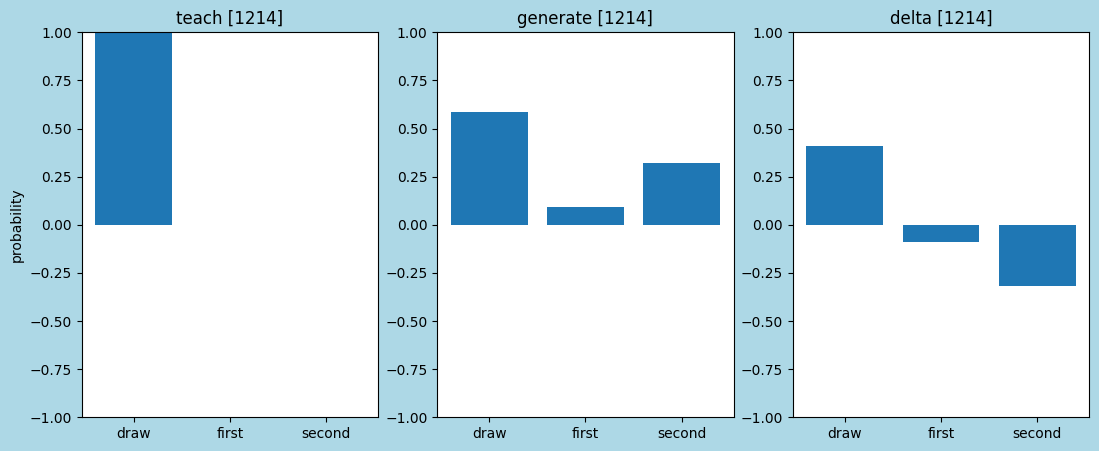

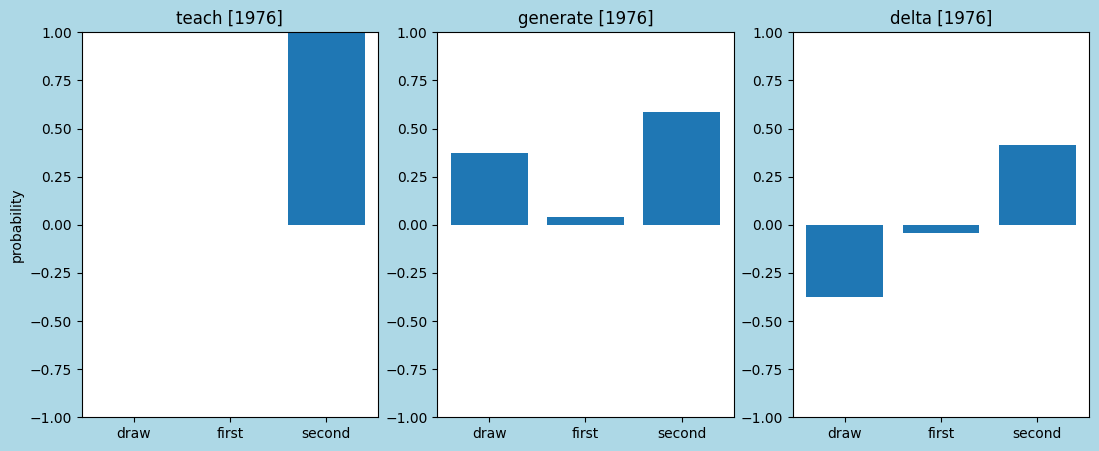

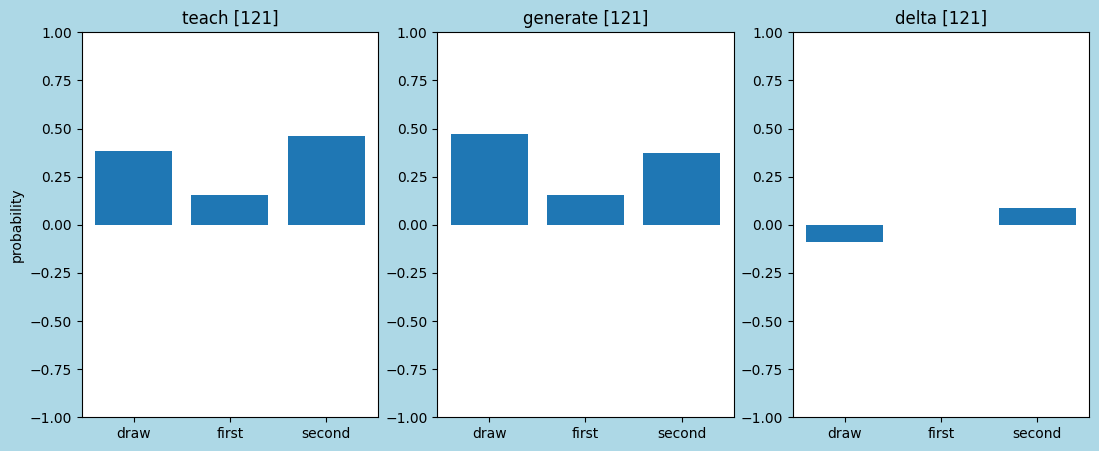

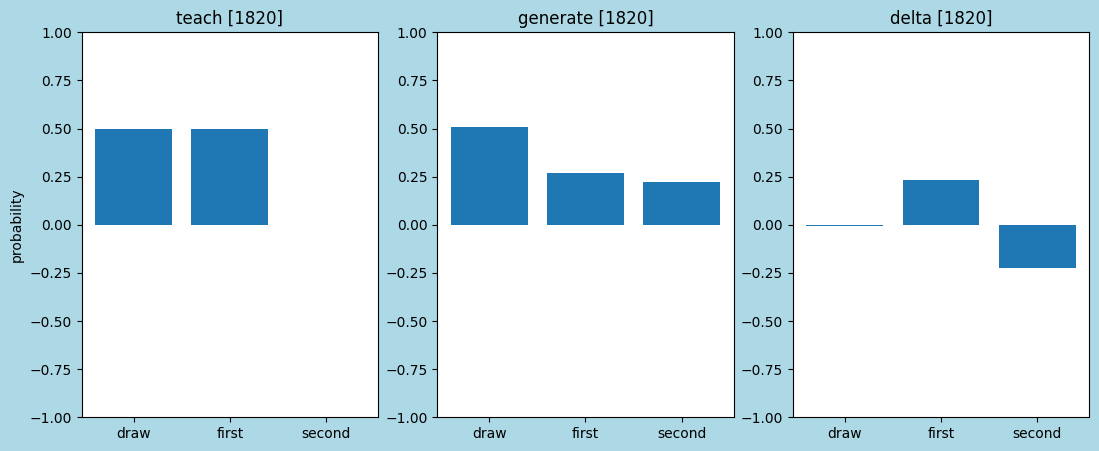

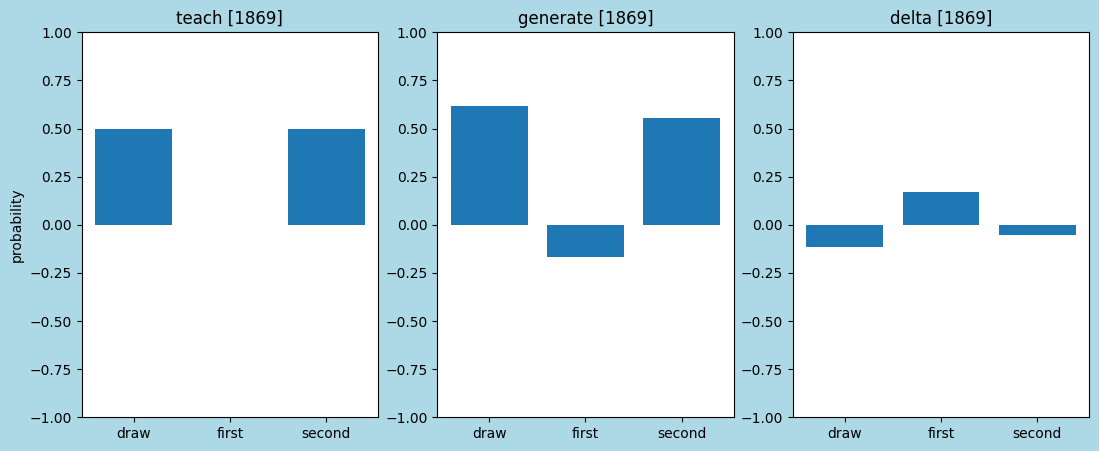

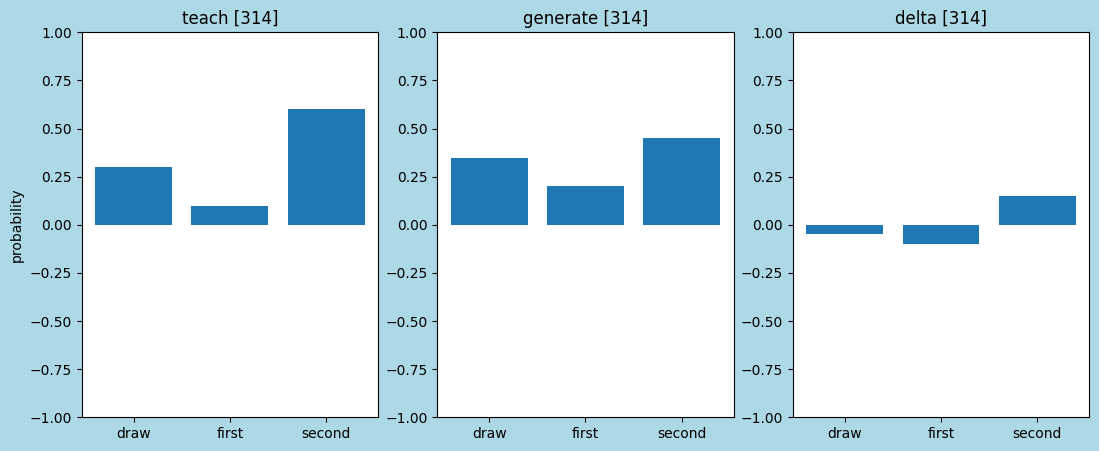

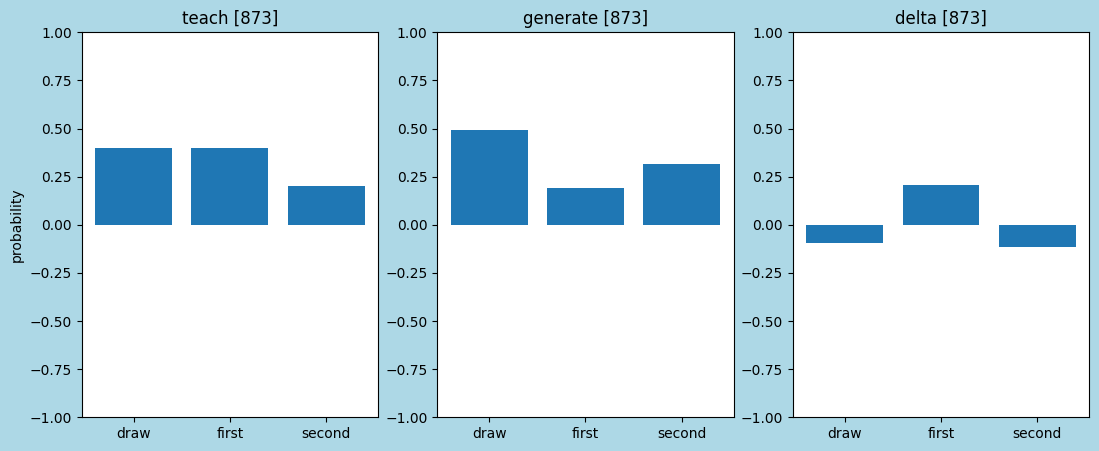

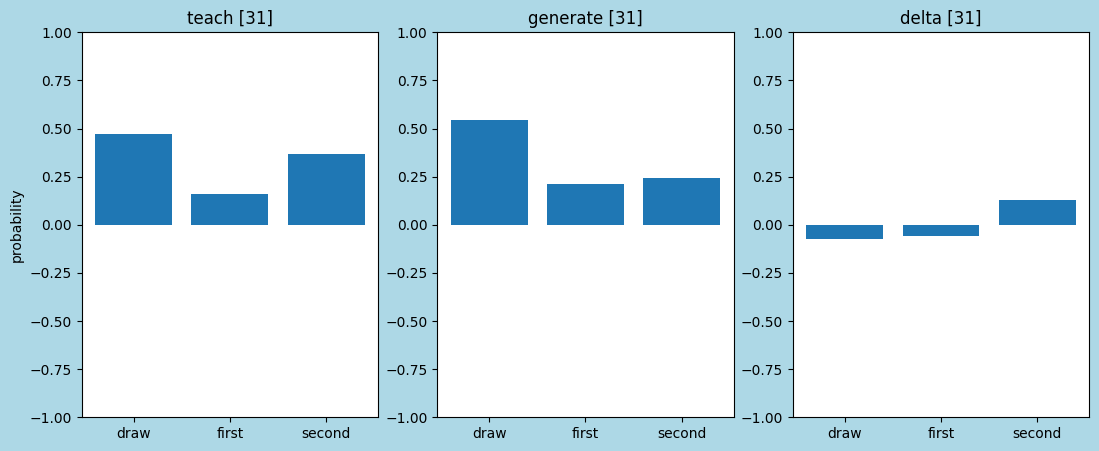

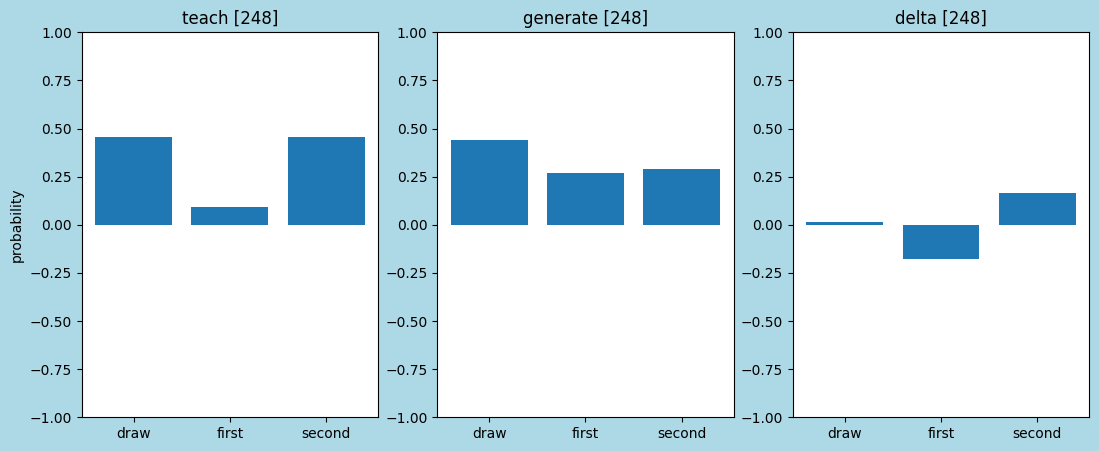

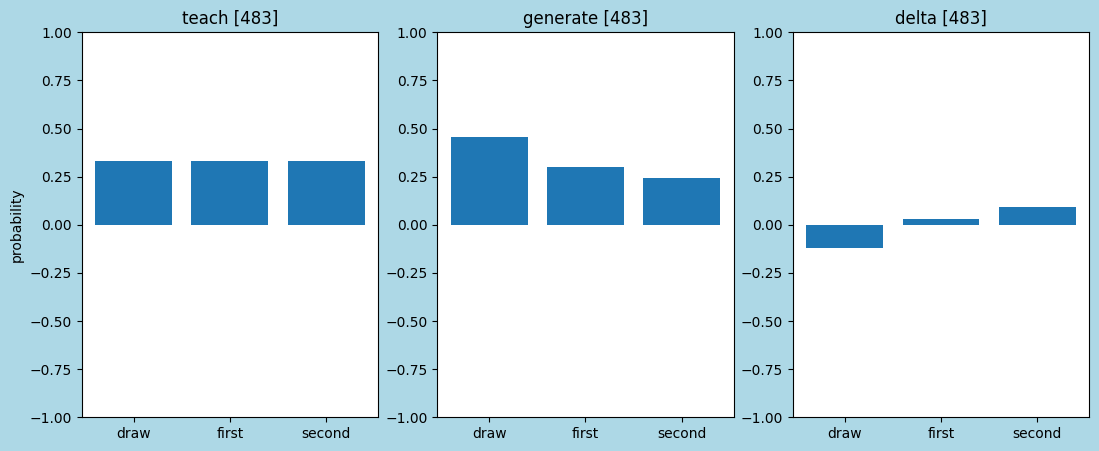

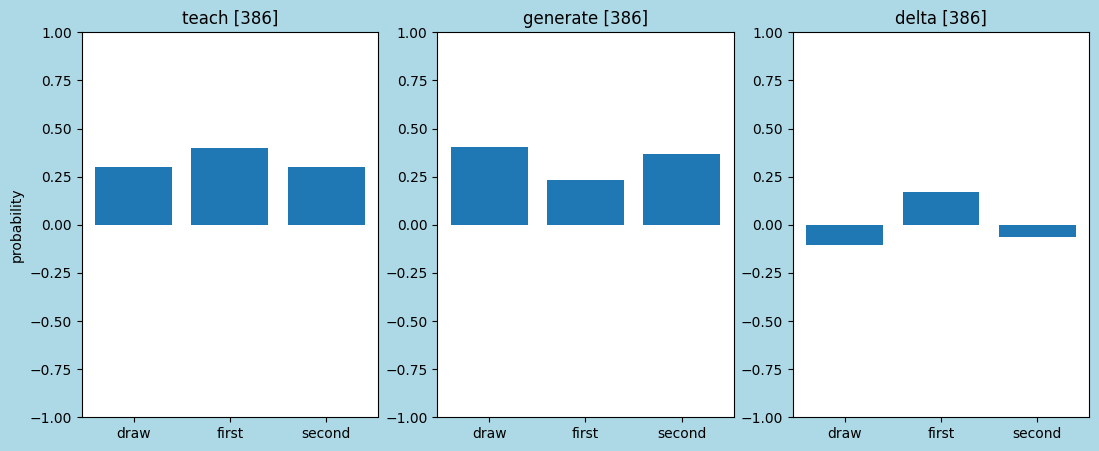

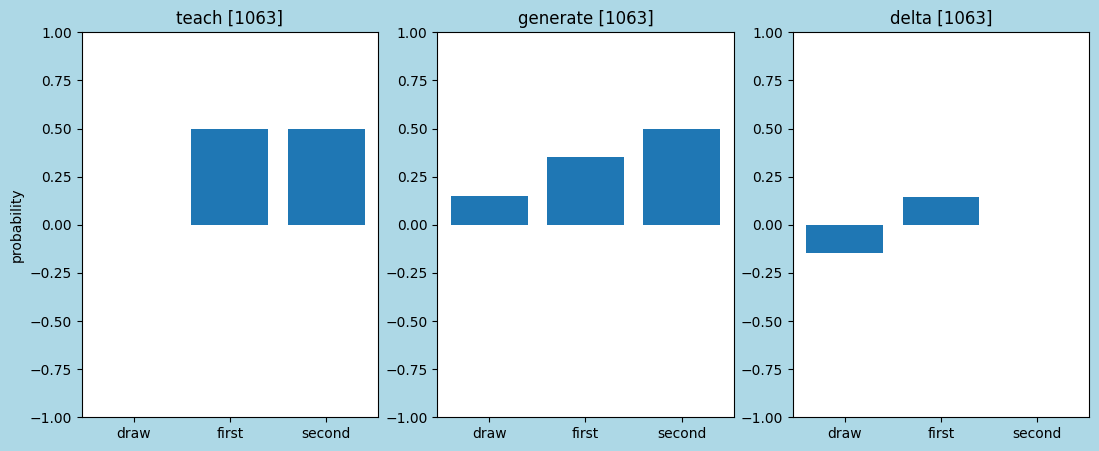

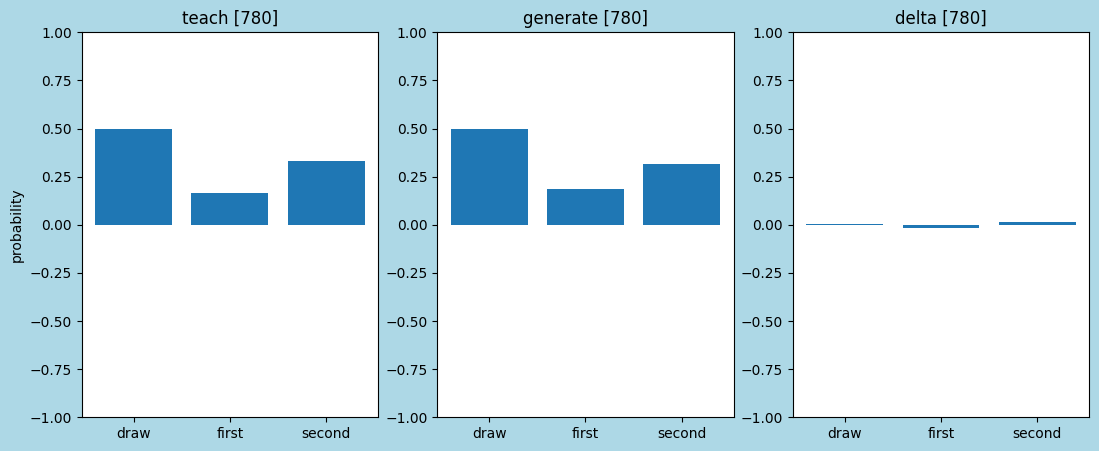

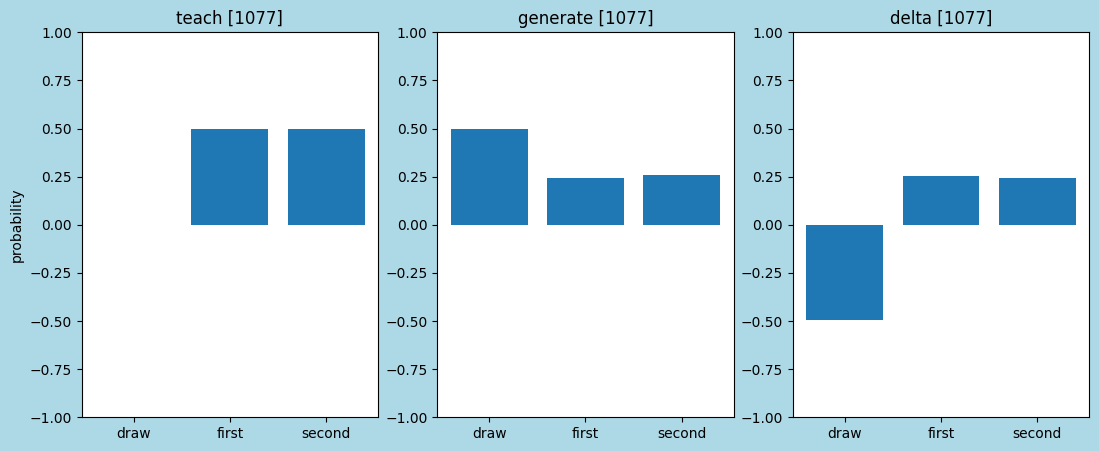

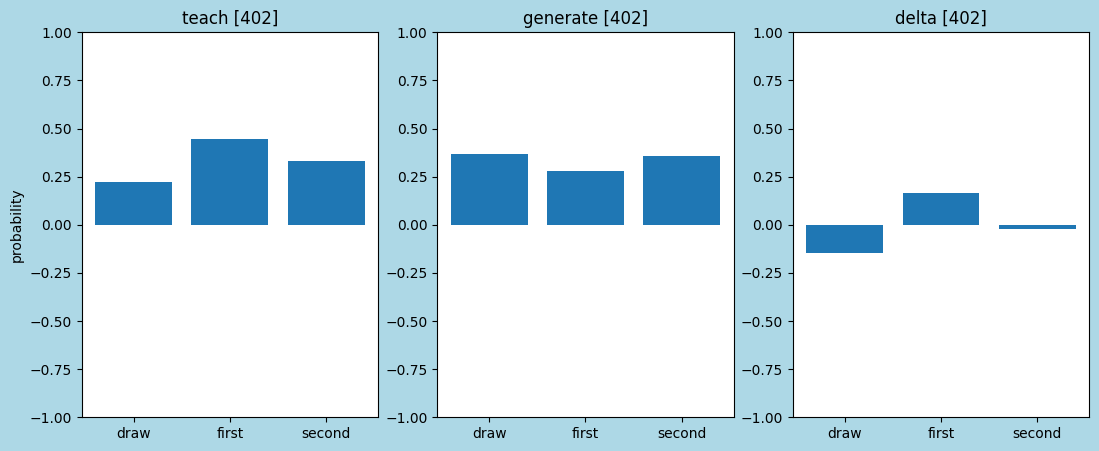

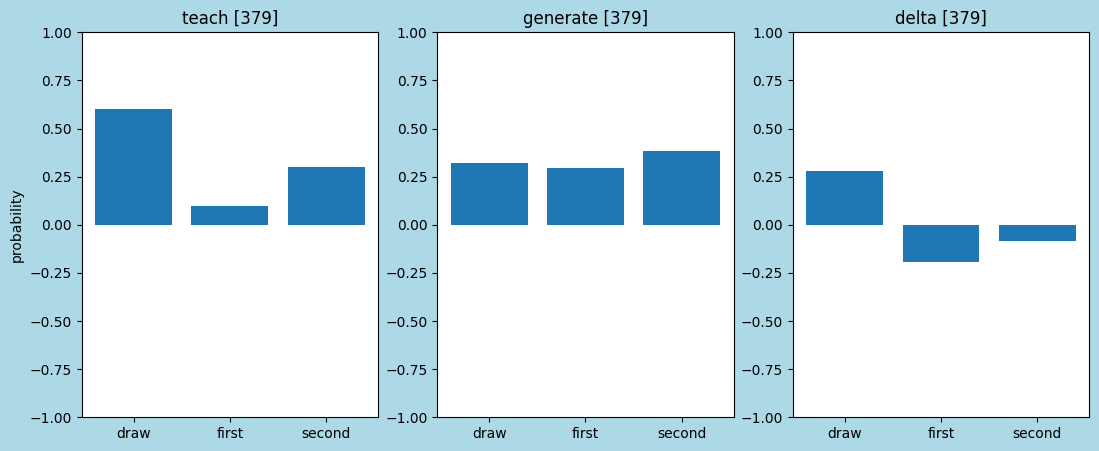

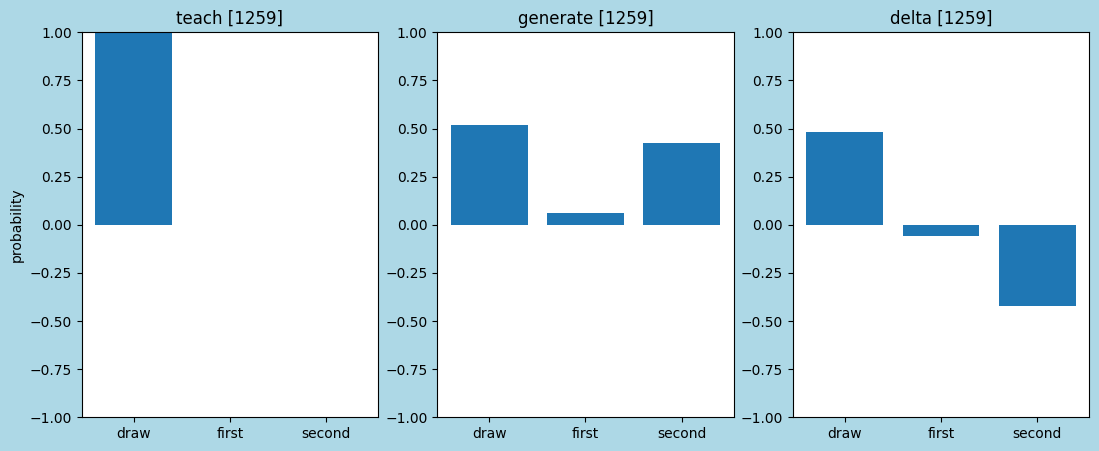

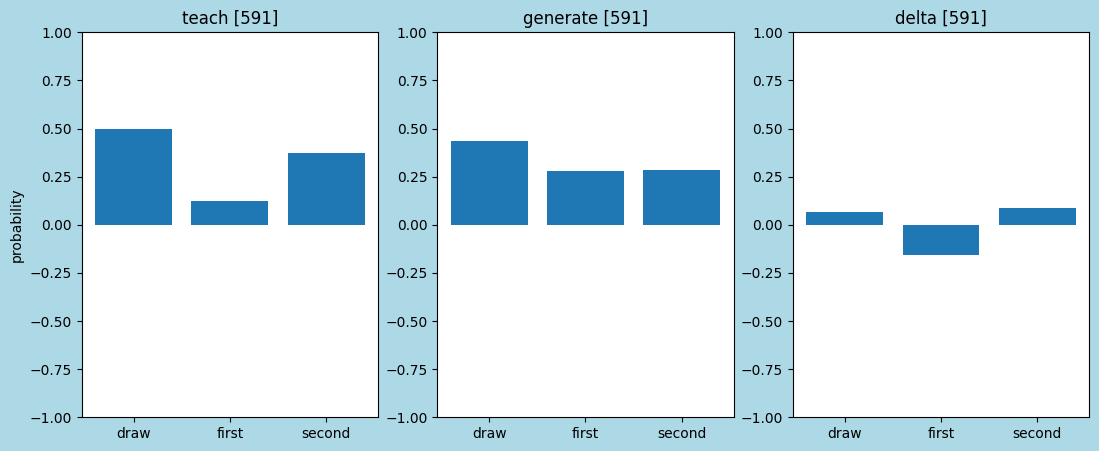

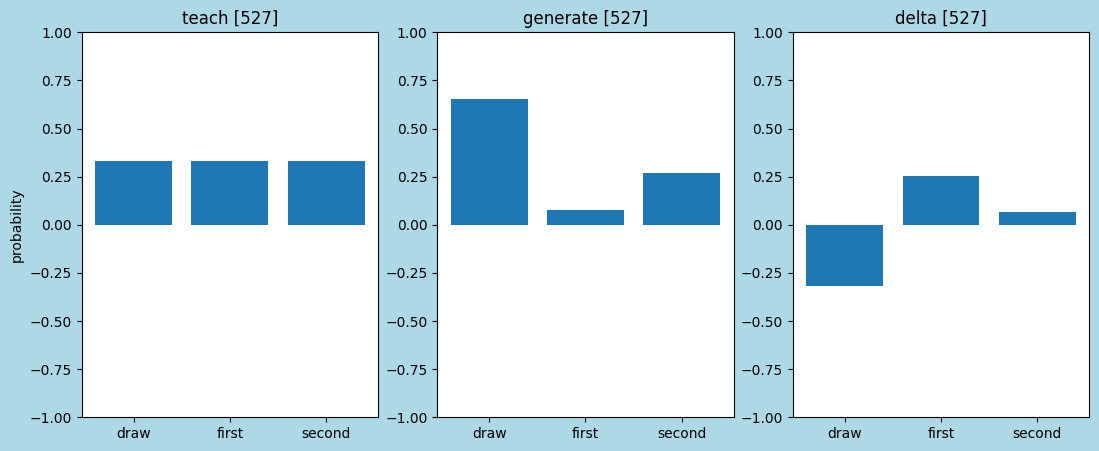

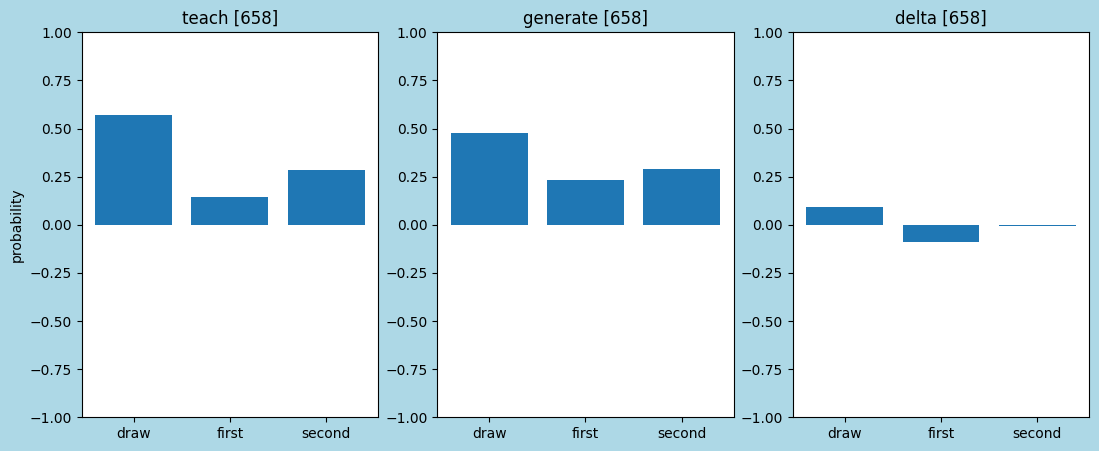

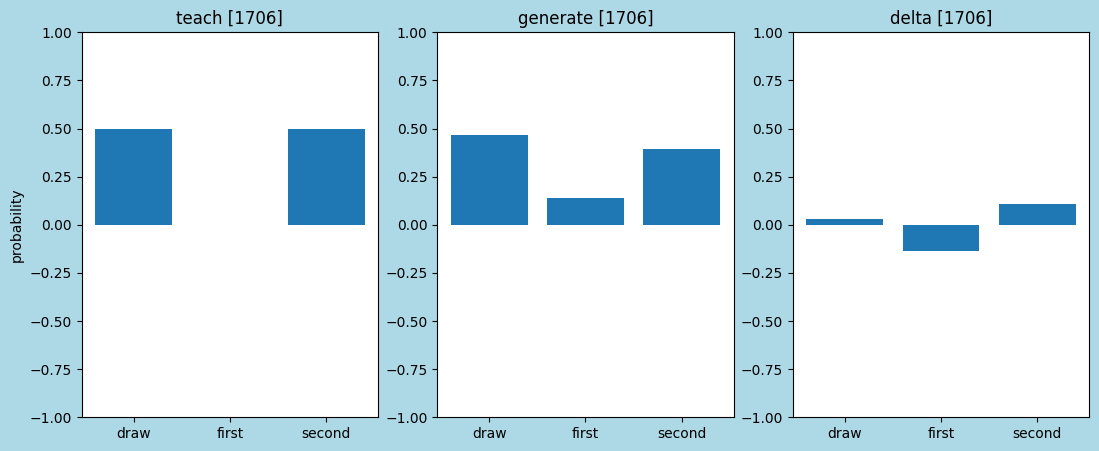

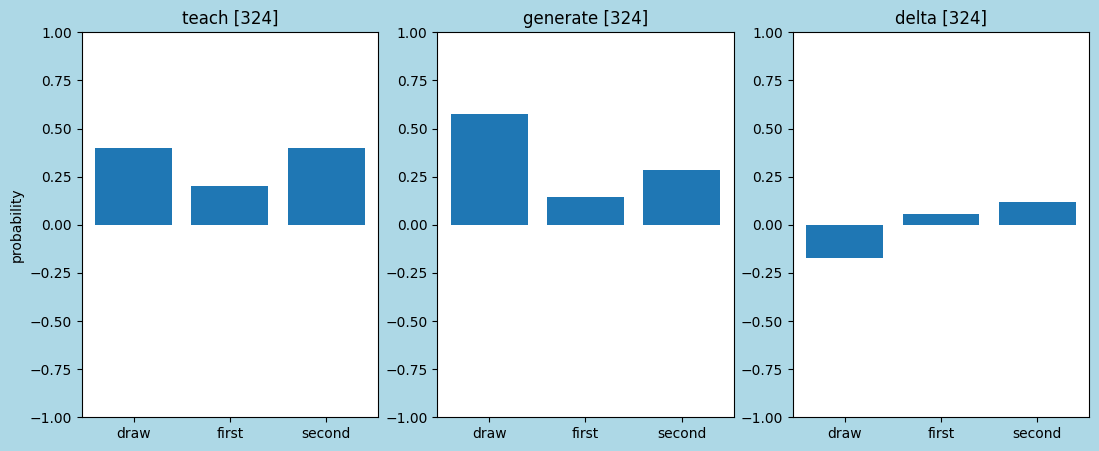

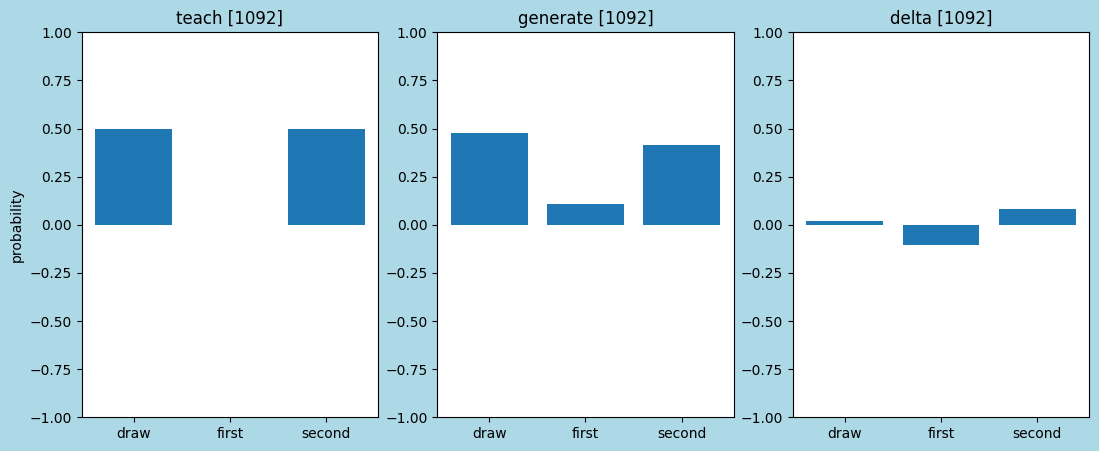

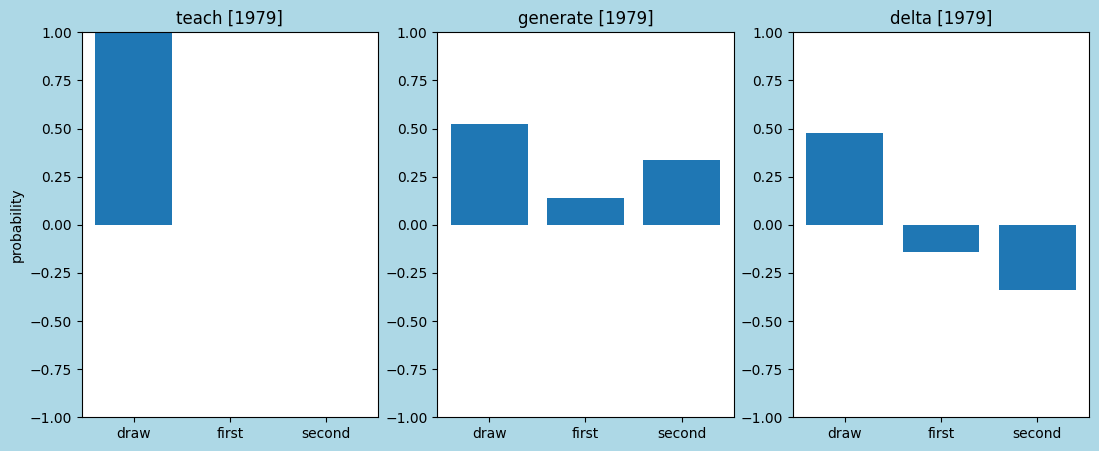

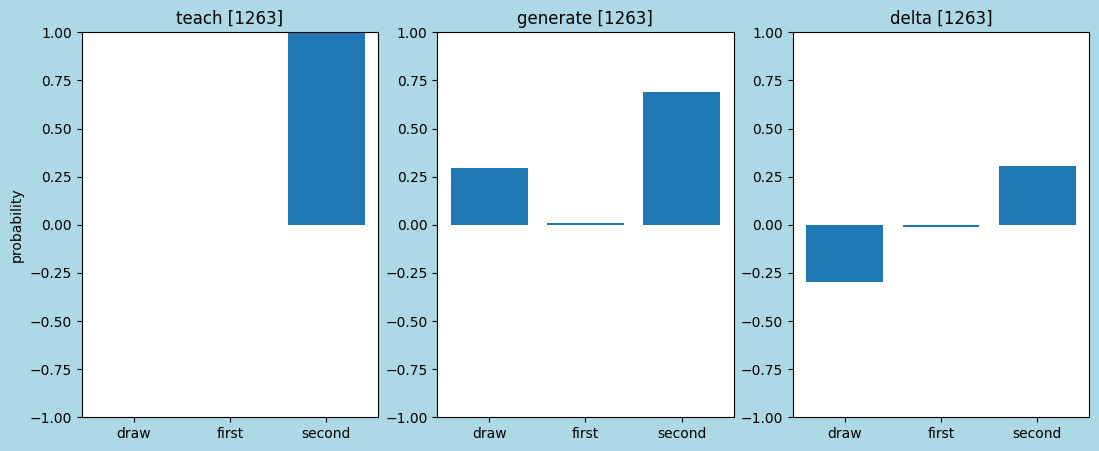

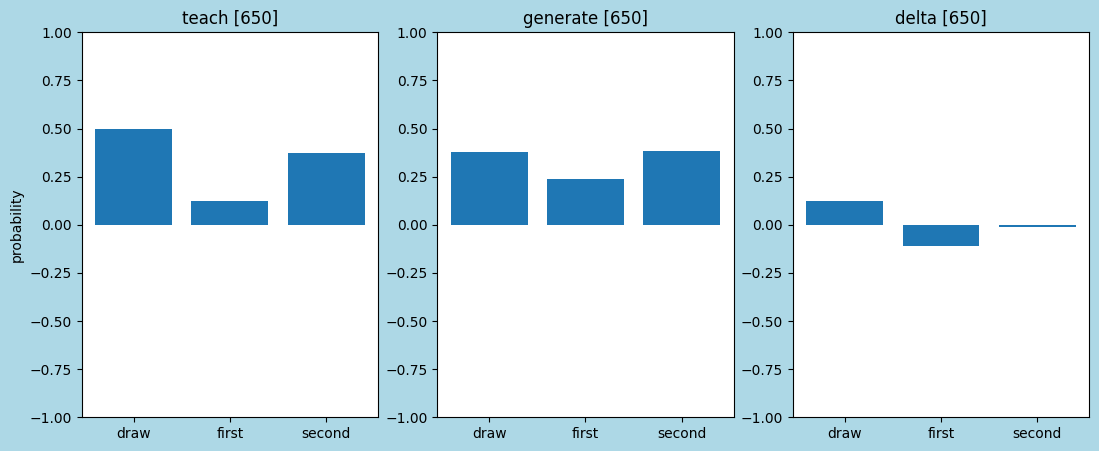

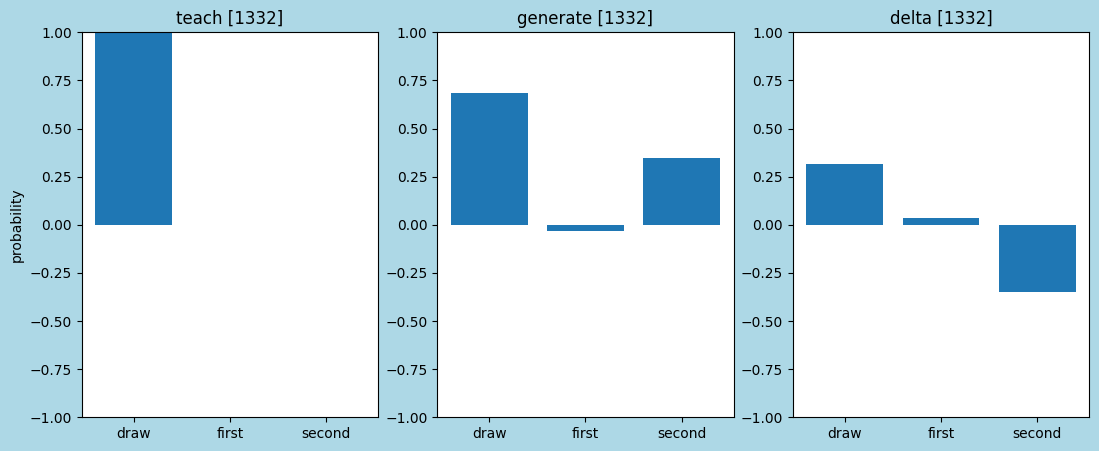

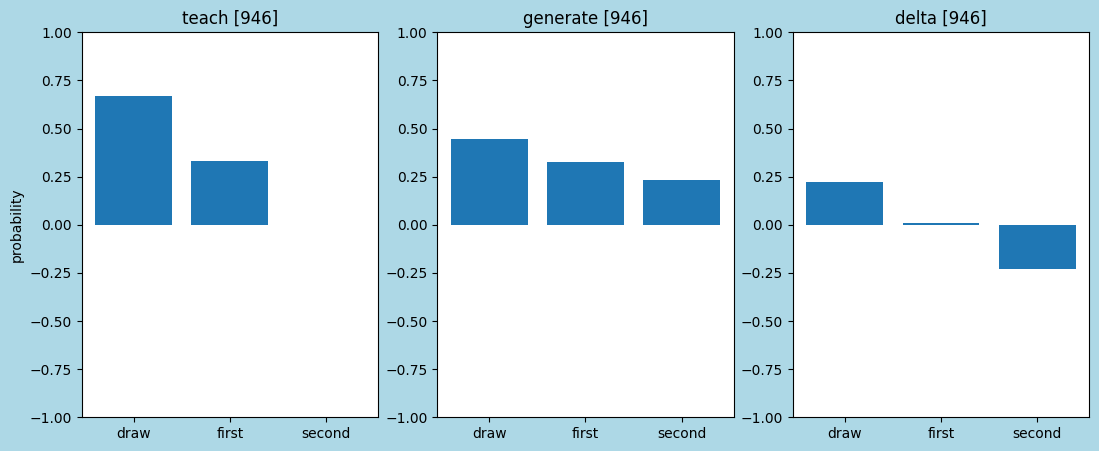

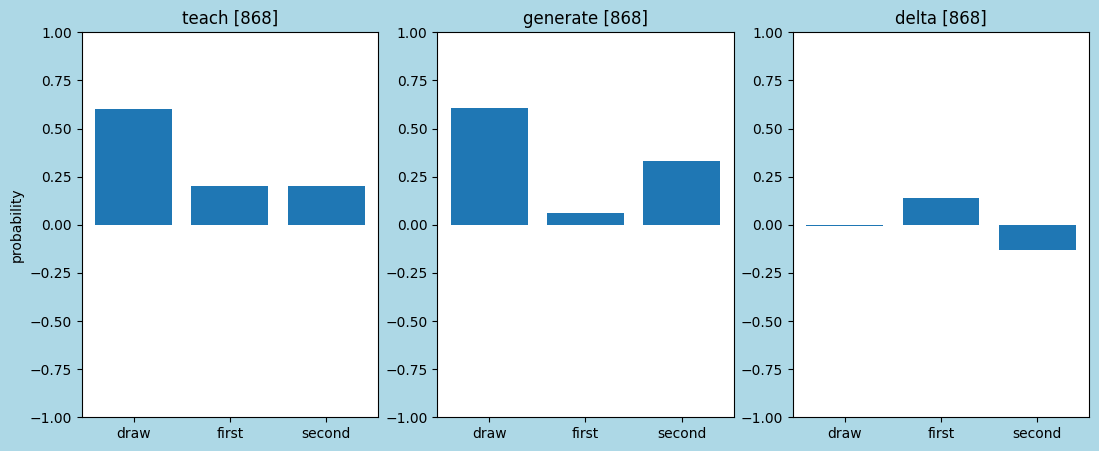

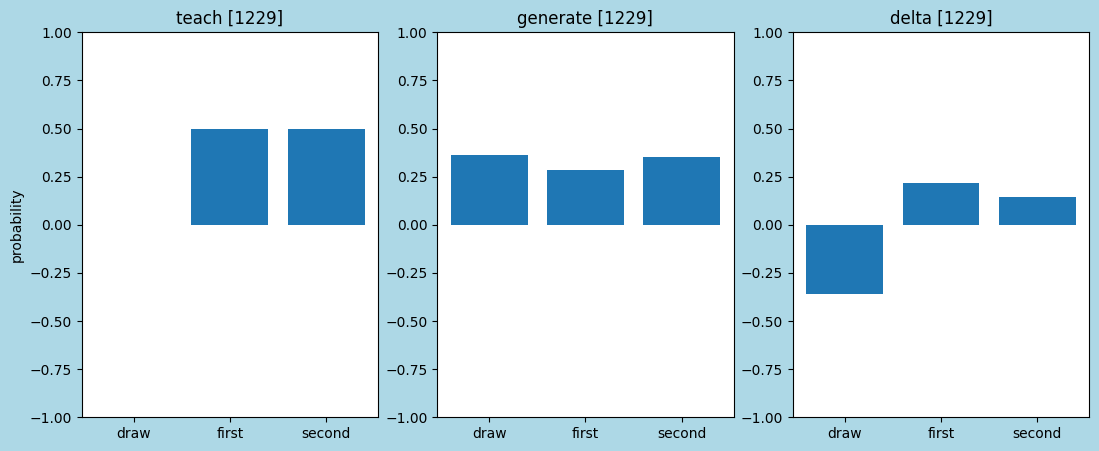

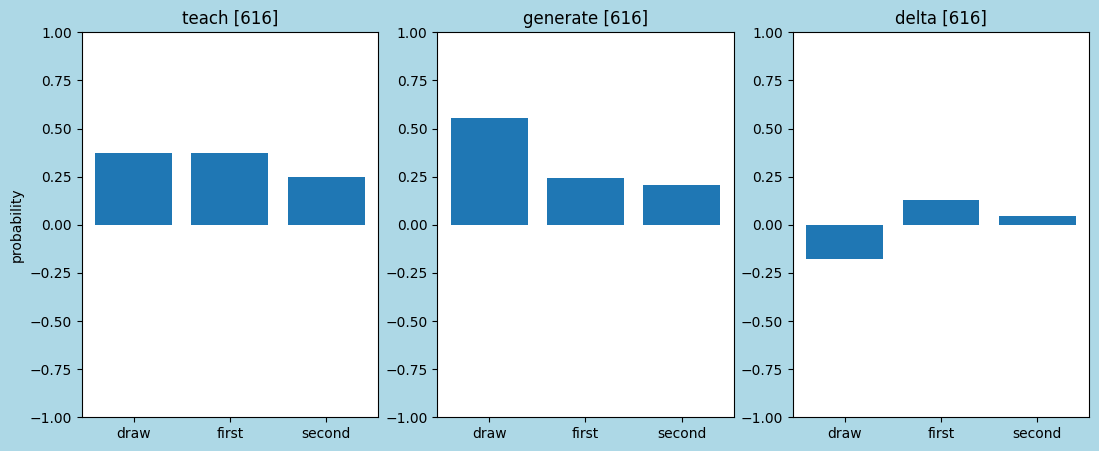

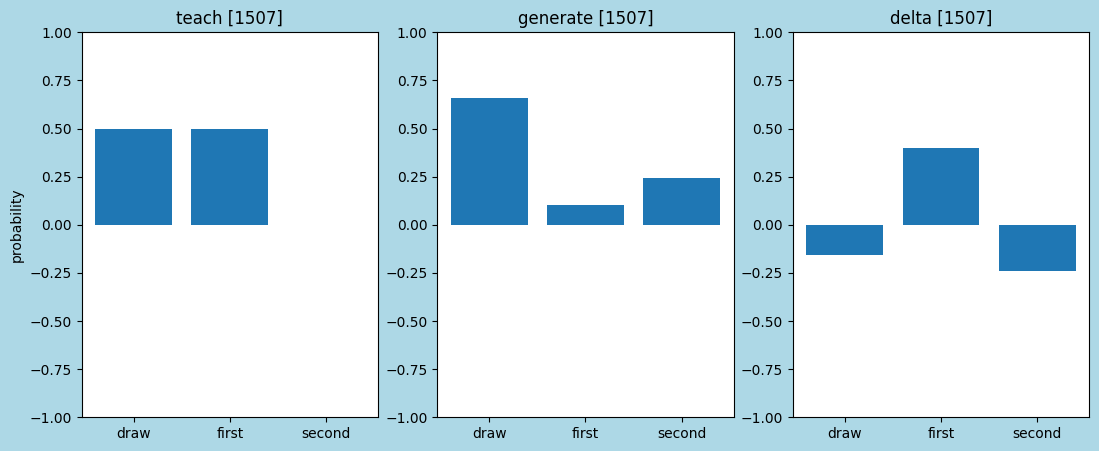

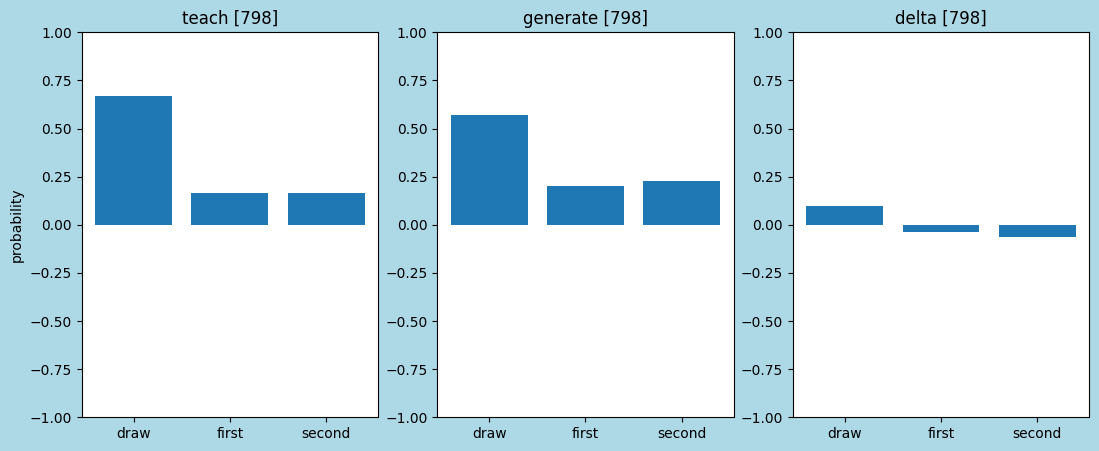

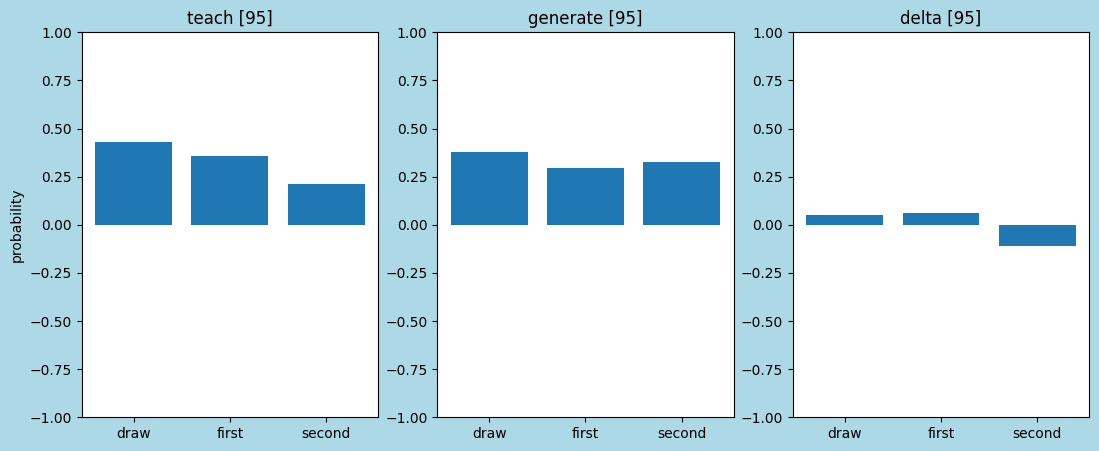

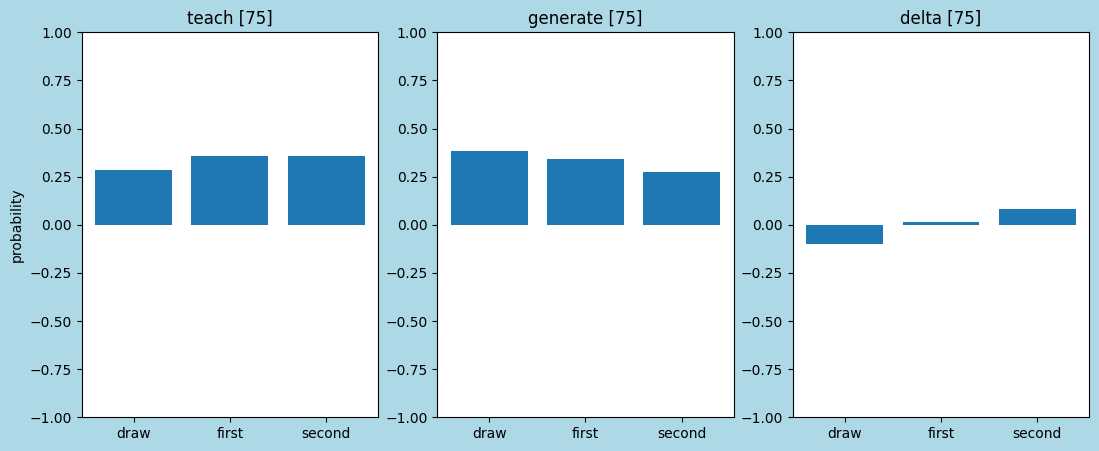

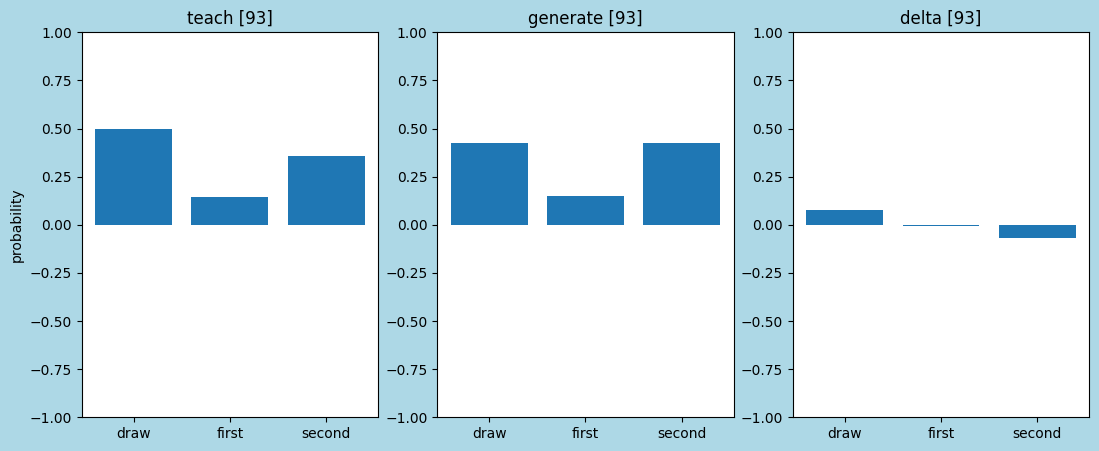

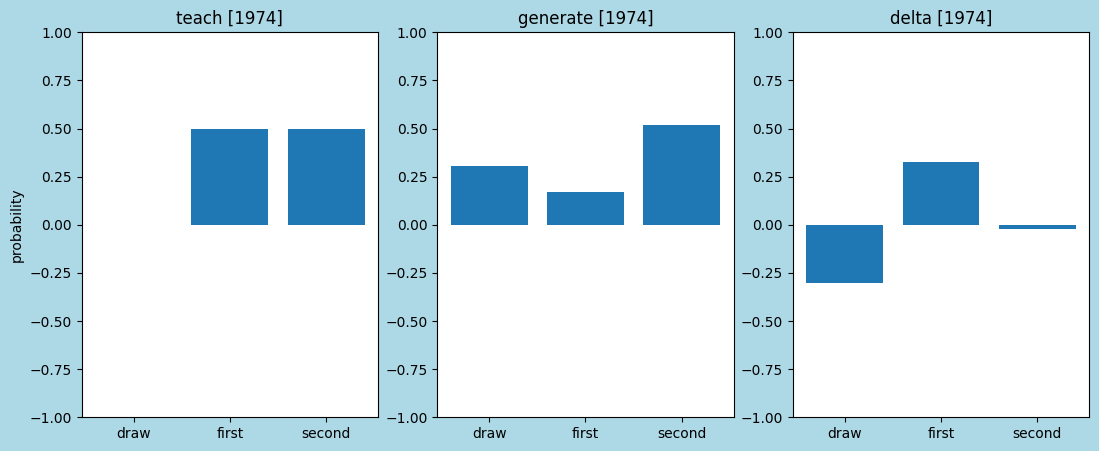

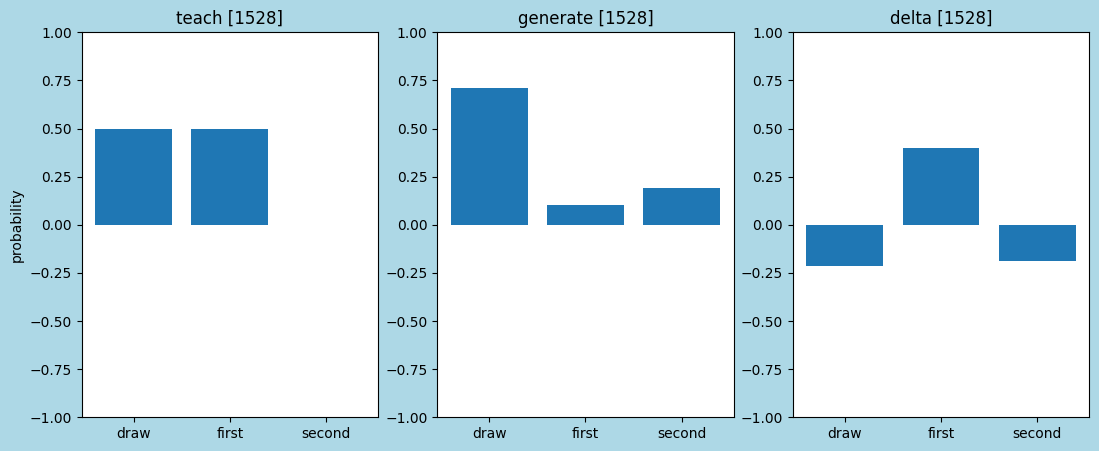

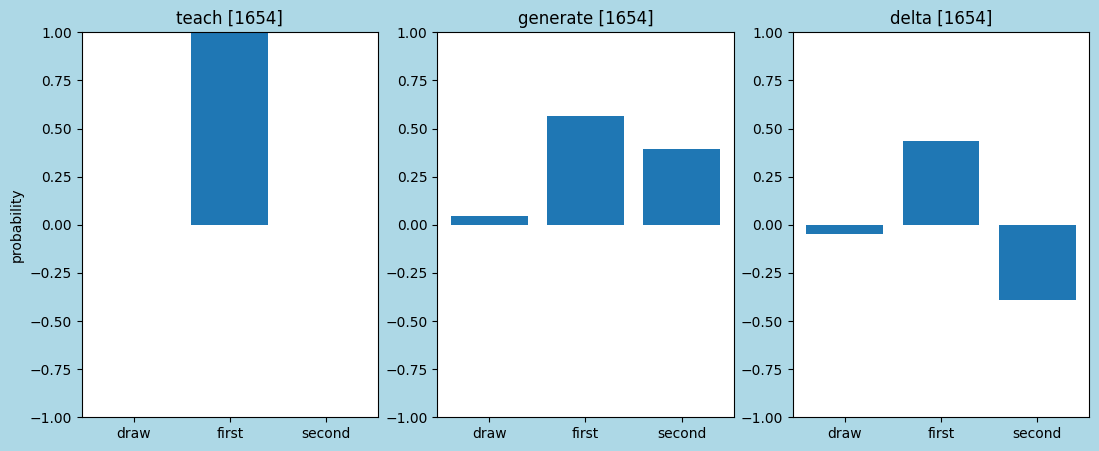

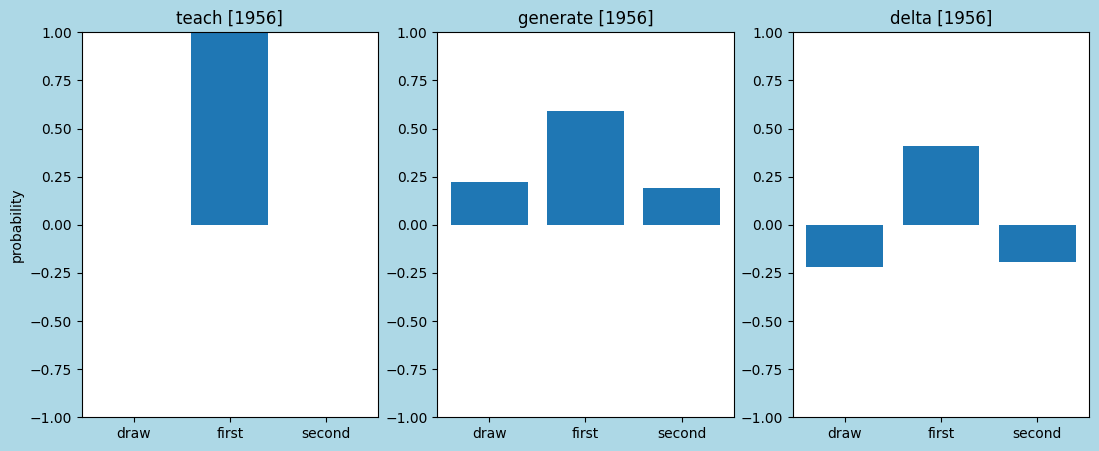

In [9]:
import matplotlib.pyplot as plt
import random

for i in range(100):
    index = random.randint(1, 2000)

    label = ['draw', 'first', 'second']

    fig = plt.figure(figsize = (13, 5), facecolor= 'lightblue')
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    teach = output.loc[index].to_numpy().astype(float)
    generate = predictions[index]
    delta = teach - generate

    df = pd.DataFrame([teach, generate, delta], ['teach', 'generate', 'delta'], ['draw', 'first', 'second'])
    print(df)

    ax1.set_ylabel("probability")
    ax1.set_title(f"teach [{index}]")
    ax2.set_title(f"generate [{index}]")
    ax3.set_title(f"delta [{index}]")
    ax1.set_ylim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax3.set_ylim(-1, 1)
    ax1.bar(label, teach)
    ax2.bar(label, generate)
    ax3.bar(label, delta)